In [80]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Libraries for modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

In [81]:
# Reading the data file - FIATreeSpeciesCode_pft.csv
df_fia_species = pd.read_csv("./FIA/FIATreeSpeciesCode_pft.csv", sep=";")
df_fia_species_imp = df_fia_species[['SPCD', 'COMMON_NAME', 'PFT','OCC.NC', 'OCC.NE', 'OCC.PNW', 'OCC.RM', 'OCC.SO']].copy()
df_fia_species_imp.head()

,SPCD,COMMON_NAME,PFT,OCC.NC,OCC.NE,OCC.PNW,OCC.RM,OCC.SO
0,10,fir spp.,Evergreen conifer,X,X,-,-,X
1,11,Pacific silver fir,Evergreen conifer,-,-,X,-,-
2,12,balsam fir,Evergreen conifer,X,X,-,-,X
3,14,Santa Lucia or bristlecone fir,Evergreen conifer,-,-,X,-,-
4,15,white fir,Evergreen conifer,X,-,X,X,X


In [82]:
# Reading the data file - CA_TREE.csv
df_fia_tree = pd.read_csv("./FIA/CA_TREE.csv", low_memory=False)
df_fia_tree_imp = df_fia_tree[['STATECD', 'PLOT', 'PLT_CN', 'UNITCD', 'COUNTYCD', 'TREE', 'SPCD', 'DIA', 'HT', 'CR']].copy()
df_fia_tree_imp.head()

,STATECD,PLOT,PLT_CN,UNITCD,COUNTYCD,TREE,SPCD,DIA,HT,CR
0,6,1,11839,1,15,675267,631.00,3.90,43.00,15.00
1,6,1,11839,1,15,675268,202.00,24.10,95.00,45.00
2,6,1,11839,1,15,675269,631.00,14.20,56.00,35.00
3,6,1,11839,1,15,675270,631.00,10.50,52.00,35.00
4,6,1,11839,1,15,675271,202.00,2.50,41.00,25.00


In [83]:
df_fia_plot = pd.read_csv("./FIA/CA_PLOT.csv", low_memory=False)
df_fia_plot_imp = df_fia_plot[['PLOT_STATUS_CD', 'LAT', 'LON', 'ELEV', 'ECOSUBCD', 'CN']].copy()
df_fia_plot_imp.head()

,PLOT_STATUS_CD,LAT,LON,ELEV,ECOSUBCD,CN
0,2,37.21,-118.83,10300.00,M261Eo,750083878290487
1,2,37.16,-117.46,3900.00,341Fd,750083879290487
2,3,41.96,-123.29,5500.00,M261Ao,786779832290487
3,1,41.99,-123.13,3700.00,M261Ao,786779833290487
4,1,41.99,-123.20,3500.00,M261Ao,786779834290487


In [84]:
# Analyzing the shape
print(df_fia_species_imp.shape)
print(df_fia_tree_imp.shape)
print(df_fia_plot_imp.shape)

(458, 8)
(427519, 10)
(42036, 6)


In [85]:
# Merging the files based on SPCD
df_fia = df_fia_tree_imp.merge(df_fia_species_imp, on="SPCD", how="left")

In [86]:
df_fia = df_fia.merge(df_fia_plot_imp, left_on="PLT_CN", right_on="CN", how="left")
df_fia.head()

,STATECD,PLOT,PLT_CN,UNITCD,COUNTYCD,TREE,SPCD,DIA,HT,CR,...,OCC.NE,OCC.PNW,OCC.RM,OCC.SO,PLOT_STATUS_CD,LAT,LON,ELEV,ECOSUBCD,CN
0,6,1,11839,1,15,675267,631.00,3.90,43.00,15.00,...,-,X,-,-,1,41.48,-123.95,1300.00,263Ab,11839
1,6,1,11839,1,15,675268,202.00,24.10,95.00,45.00,...,X,X,X,X,1,41.48,-123.95,1300.00,263Ab,11839
2,6,1,11839,1,15,675269,631.00,14.20,56.00,35.00,...,-,X,-,-,1,41.48,-123.95,1300.00,263Ab,11839
3,6,1,11839,1,15,675270,631.00,10.50,52.00,35.00,...,-,X,-,-,1,41.48,-123.95,1300.00,263Ab,11839
4,6,1,11839,1,15,675271,202.00,2.50,41.00,25.00,...,X,X,X,X,1,41.48,-123.95,1300.00,263Ab,11839


In [87]:
print(df_fia.shape)

(427519, 23)


In [88]:
df_fia['CBH'] = df_fia["HT"] * (1 - df_fia["CR"] / 100)
df_fia[['CBH', 'HT', 'CR']].head()

,CBH,HT,CR
0,36.55,43.00,15.00
1,52.25,95.00,45.00
2,36.40,56.00,35.00
3,33.80,52.00,35.00
4,30.75,41.00,25.00


In [89]:
# Analyzing the distribution of PFT
df_fia['PFT'].value_counts()

PFT
Evergreen conifer          279767
Evergreen broadleaf         57704
Deciduous broadleaf         49594
Deciduous                   33760
Evergreen                    6431
Flowering plants              230
Unknown                         6
Broadleaf                       4
Nitrogen fixing legumes         2
Deciduous confier               2
Name: count, dtype: int64

In [90]:
df_fia.columns

Index(['STATECD', 'PLOT', 'PLT_CN', 'UNITCD', 'COUNTYCD', 'TREE', 'SPCD',
       'DIA', 'HT', 'CR', 'COMMON_NAME', 'PFT', 'OCC.NC', 'OCC.NE', 'OCC.PNW',
       'OCC.RM', 'OCC.SO', 'PLOT_STATUS_CD', 'LAT', 'LON', 'ELEV', 'ECOSUBCD',
       'CN', 'CBH'],
      dtype='object')

In [91]:
# Creating a checkpoint dataset after removing the null values
# df_fia_ckpt1 = df_fia.drop(['PREV_TRE_CN', 'PREVCOND','], axis=1)
# df_fia_ckpt1 = df_fia_ckpt1.dropna(axis=0)
# df_fia_ckpt1.isna().sum()

df_fia_ckpt1 = df_fia[['DIA', 'HT', 'LAT', 'LON', 'ECOSUBCD', 'PFT','OCC.NC', 'OCC.NE', 'OCC.PNW',
       'OCC.RM', 'OCC.SO']].copy()
df_fia_ckpt1.head()

,DIA,HT,LAT,LON,ECOSUBCD,PFT,OCC.NC,OCC.NE,OCC.PNW,OCC.RM,OCC.SO
0,3.90,43.00,41.48,-123.95,263Ab,Deciduous,-,-,X,-,-
1,24.10,95.00,41.48,-123.95,263Ab,Evergreen conifer,X,X,X,X,X
2,14.20,56.00,41.48,-123.95,263Ab,Deciduous,-,-,X,-,-
3,10.50,52.00,41.48,-123.95,263Ab,Deciduous,-,-,X,-,-
4,2.50,41.00,41.48,-123.95,263Ab,Evergreen conifer,X,X,X,X,X


In [92]:
df_fia_ckpt1.isna().sum()

DIA         38452
HT          38451
LAT             0
LON             0
ECOSUBCD        0
PFT            19
OCC.NC         19
OCC.NE         19
OCC.PNW        19
OCC.RM         19
OCC.SO         19
dtype: int64

In [93]:
df_fia_ckpt2 = df_fia_ckpt1.dropna(axis=0).copy()
df_fia_ckpt2.head()

,DIA,HT,LAT,LON,ECOSUBCD,PFT,OCC.NC,OCC.NE,OCC.PNW,OCC.RM,OCC.SO
0,3.90,43.00,41.48,-123.95,263Ab,Deciduous,-,-,X,-,-
1,24.10,95.00,41.48,-123.95,263Ab,Evergreen conifer,X,X,X,X,X
2,14.20,56.00,41.48,-123.95,263Ab,Deciduous,-,-,X,-,-
3,10.50,52.00,41.48,-123.95,263Ab,Deciduous,-,-,X,-,-
4,2.50,41.00,41.48,-123.95,263Ab,Evergreen conifer,X,X,X,X,X


In [94]:
print(df_fia_ckpt2.shape)

(389048, 11)


In [95]:
# Converting from inches to cm
df_fia_ckpt2['DIA_cm'] = df_fia_ckpt2['DIA'] * 2.54
df_fia_ckpt2.head()

,DIA,HT,LAT,LON,ECOSUBCD,PFT,OCC.NC,OCC.NE,OCC.PNW,OCC.RM,OCC.SO,DIA_cm
0,3.90,43.00,41.48,-123.95,263Ab,Deciduous,-,-,X,-,-,9.91
1,24.10,95.00,41.48,-123.95,263Ab,Evergreen conifer,X,X,X,X,X,61.21
2,14.20,56.00,41.48,-123.95,263Ab,Deciduous,-,-,X,-,-,36.07
3,10.50,52.00,41.48,-123.95,263Ab,Deciduous,-,-,X,-,-,26.67
4,2.50,41.00,41.48,-123.95,263Ab,Evergreen conifer,X,X,X,X,X,6.35


In [96]:
df_fia_ckpt2.isna().sum()

DIA         0
HT          0
LAT         0
LON         0
ECOSUBCD    0
PFT         0
OCC.NC      0
OCC.NE      0
OCC.PNW     0
OCC.RM      0
OCC.SO      0
DIA_cm      0
dtype: int64

In [97]:
# Create a dictionary mapping SPCD to COMMON_NAME
fia_ref_species_table = pd.read_csv('./FIA/REF_SPECIES.csv')
spcd_to_common_name = dict(zip(fia_ref_species_table['SPCD'], fia_ref_species_table['COMMON_NAME']))

In [98]:
# Define the ECOSUBCDs to keep
ecosubcd_keep = ['M261Ep', '261Ba', 'M261Em', '263Am', 'M261Ej']

# Filter the DataFrame
df_fia_ckpt2_filtered = df_fia_ckpt2[df_fia_ckpt2['ECOSUBCD'].isin(ecosubcd_keep)]
df_fia_ckpt2_filtered.head()

,DIA,HT,LAT,LON,ECOSUBCD,PFT,OCC.NC,OCC.NE,OCC.PNW,OCC.RM,OCC.SO,DIA_cm
26897,19.10,55.00,38.72,-120.23,M261Em,Evergreen conifer,-,-,X,X,-,48.51
26898,18.50,64.00,38.72,-120.23,M261Em,Evergreen conifer,X,-,X,X,X,46.99
26899,4.10,10.00,38.72,-120.23,M261Em,Evergreen conifer,-,-,X,X,-,10.41
26900,11.80,34.00,38.72,-120.23,M261Em,Deciduous broadleaf,-,-,X,-,-,29.97
26901,14.70,43.00,38.72,-120.23,M261Em,Evergreen conifer,-,-,X,X,-,37.34


In [99]:
# Shuffle the filtered DataFrame
df_fia_ckpt2_filtered_shuffled = df_fia_ckpt2_filtered.sample(frac=1, random_state=42).reset_index(drop=True)
df_fia_ckpt2_filtered_shuffled.head()

,DIA,HT,LAT,LON,ECOSUBCD,PFT,OCC.NC,OCC.NE,OCC.PNW,OCC.RM,OCC.SO,DIA_cm
0,6.10,25.00,37.51,-119.74,M261Ep,Evergreen conifer,-,-,X,X,-,15.49
1,1.00,7.00,38.15,-120.06,M261Em,Evergreen conifer,X,-,X,X,X,2.54
2,16.80,66.00,37.08,-119.38,M261Ep,Evergreen conifer,-,-,X,X,-,42.67
3,17.20,49.00,38.61,-120.37,M261Em,Evergreen conifer,-,-,X,X,-,43.69
4,7.80,40.00,37.37,-119.54,M261Ep,Evergreen conifer,-,-,X,X,-,19.81


In [100]:
tls_treelist_df = pd.read_csv("./TLS/TLS_treelist.csv")
df_plot_identification = pd.read_csv("./TLS/blk_plot_identification.csv")
df_tls_data = tls_treelist_df.merge(df_plot_identification,on="plot_blk", how="left")
df_tls_data.head()

,Unnamed: 0_x,TreeID,X,Y,Radius,Error,H,h_radius,DBH,BasalA,...,plot_num,inventory_date,inventory_hour,plot_coord_x,plot_coord_y,plot_coord_srs,plot_declination,inventory_plot_diam,plot_slopeper,plot_aspectdegre
0,0,1,10.67,2.13,0.27,0.00,12.56,1.30,20.99,2.40,...,101.00,8/2/24,9:20,298018.00,4108419.00,26911.00,12.28°E,11.30,25.00,89.00
1,3,6,2.43,1.06,0.17,0.00,8.74,1.30,13.11,0.94,...,101.00,8/2/24,9:20,298018.00,4108419.00,26911.00,12.28°E,11.30,25.00,89.00
2,4,8,2.15,0.95,0.76,0.00,13.47,1.30,59.84,19.53,...,101.00,8/2/24,9:20,298018.00,4108419.00,26911.00,12.28°E,11.30,25.00,89.00
3,5,9,1.96,8.78,0.27,0.00,18.14,1.30,21.04,2.41,...,101.00,8/2/24,9:20,298018.00,4108419.00,26911.00,12.28°E,11.30,25.00,89.00
4,6,12,1.43,0.23,0.21,0.00,13.79,1.30,16.39,1.47,...,101.00,8/2/24,9:20,298018.00,4108419.00,26911.00,12.28°E,11.30,25.00,89.00


In [101]:
df_tls_data['site_name_label'].value_counts()

site_name_label
Calaveras Big Trees State Park    408
Independence Lake (IND)           229
Shaver Lake (SHA)                 209
Winton-Schaads VMP (WIN)          176
Pacific Union College (PUC)       176
Sedgwick Reserve (SDR)             88
Name: count, dtype: int64

In [102]:
df_fia_ckpt2_filtered_shuffled.head()

,DIA,HT,LAT,LON,ECOSUBCD,PFT,OCC.NC,OCC.NE,OCC.PNW,OCC.RM,OCC.SO,DIA_cm
0,6.10,25.00,37.51,-119.74,M261Ep,Evergreen conifer,-,-,X,X,-,15.49
1,1.00,7.00,38.15,-120.06,M261Em,Evergreen conifer,X,-,X,X,X,2.54
2,16.80,66.00,37.08,-119.38,M261Ep,Evergreen conifer,-,-,X,X,-,42.67
3,17.20,49.00,38.61,-120.37,M261Em,Evergreen conifer,-,-,X,X,-,43.69
4,7.80,40.00,37.37,-119.54,M261Ep,Evergreen conifer,-,-,X,X,-,19.81


In [103]:
"""df_encoded = pd.get_dummies(df_fia_ckpt2_filtered_shuffled, columns=['ECOSUBCD'])
df_encoded = df_encoded.drop(['ECOSUBCD_M261Ep'], axis=1)
df_encoded.head()"""

"df_encoded = pd.get_dummies(df_fia_ckpt2_filtered_shuffled, columns=['ECOSUBCD'])\ndf_encoded = df_encoded.drop(['ECOSUBCD_M261Ep'], axis=1)\ndf_encoded.head()"

In [104]:
# Do label encoding for ECOSUBCD
label_encoder = LabelEncoder()
df_encoded = df_fia_ckpt2_filtered_shuffled.copy()
df_encoded['ECOSUBCD'] = label_encoder.fit_transform(df_fia_ckpt2_filtered_shuffled['ECOSUBCD'])

In [105]:
df_encoded['PFT'].value_counts()

PFT
Evergreen conifer      16936
Evergreen broadleaf     3476
Deciduous broadleaf     2776
Evergreen                425
Deciduous                 96
Flowering plants          15
Broadleaf                  2
Name: count, dtype: int64

In [106]:
replace_dict = {'Deciduous': 'Deciduous Broadleaf'} 
df_encoded['PFT'] = df_encoded['PFT'].replace(replace_dict)

In [107]:
df_encoded

,DIA,HT,LAT,LON,ECOSUBCD,PFT,OCC.NC,OCC.NE,OCC.PNW,OCC.RM,OCC.SO,DIA_cm
0,6.10,25.00,37.51,-119.74,4,Evergreen conifer,-,-,X,X,-,15.49
1,1.00,7.00,38.15,-120.06,3,Evergreen conifer,X,-,X,X,X,2.54
2,16.80,66.00,37.08,-119.38,4,Evergreen conifer,-,-,X,X,-,42.67
3,17.20,49.00,38.61,-120.37,3,Evergreen conifer,-,-,X,X,-,43.69
4,7.80,40.00,37.37,-119.54,4,Evergreen conifer,-,-,X,X,-,19.81
...,...,...,...,...,...,...,...,...,...,...,...,...
23721,17.60,57.00,38.00,-120.03,3,Evergreen conifer,X,-,X,X,X,44.70
23722,7.20,28.00,36.21,-118.66,4,Deciduous broadleaf,-,-,X,-,-,18.29
23723,2.00,10.00,37.10,-119.36,4,Evergreen conifer,-,-,X,X,-,5.08
23724,6.00,20.00,35.57,-118.65,4,Deciduous broadleaf,-,-,X,-,-,15.24


In [108]:
# apply label encoding to 'OCC.NC', 'OCC.NE', 'OCC.PNW','OCC.RM', 'OCC.SO'
df_encoded['OCC.NC'] = label_encoder.fit_transform(df_encoded['OCC.NC'])
df_encoded['OCC.NE'] = label_encoder.fit_transform(df_encoded['OCC.NE'])
df_encoded['OCC.PNW'] = label_encoder.fit_transform(df_encoded['OCC.PNW'])
df_encoded['OCC.RM'] = label_encoder.fit_transform(df_encoded['OCC.RM'])
df_encoded['OCC.SO'] = label_encoder.fit_transform(df_encoded['OCC.SO'])
df_encoded.head()

,DIA,HT,LAT,LON,ECOSUBCD,PFT,OCC.NC,OCC.NE,OCC.PNW,OCC.RM,OCC.SO,DIA_cm
0,6.10,25.00,37.51,-119.74,4,Evergreen conifer,0,0,0,1,0,15.49
1,1.00,7.00,38.15,-120.06,3,Evergreen conifer,1,0,0,1,1,2.54
2,16.80,66.00,37.08,-119.38,4,Evergreen conifer,0,0,0,1,0,42.67
3,17.20,49.00,38.61,-120.37,3,Evergreen conifer,0,0,0,1,0,43.69
4,7.80,40.00,37.37,-119.54,4,Evergreen conifer,0,0,0,1,0,19.81


In [110]:
# Split into training and test sets
#independent_variables = ["DIA_cm", 'CBH', 'LAT', 'LON', 'ECOSUBCD_261Ba', 'ECOSUBCD_263Am', 'ECOSUBCD_M261Ej', 'ECOSUBCD_M261Em']
independent_variables = ["DIA_cm", 'HT', 'LAT', 'LON', 'ECOSUBCD','OCC.NC', 'OCC.NE', 'OCC.PNW','OCC.RM', 'OCC.SO']
dependent_variable = "PFT"
include_variables = independent_variables + [dependent_variable]
fia_train, fia_test = train_test_split(df_encoded[include_variables].dropna(), test_size=0.2)
print(f"Training set size: {len(fia_train)}")
print(f"Test set size: {len(fia_test)}")

# Train the model
model_pft = RandomForestClassifier(max_depth = 10, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 100)
model_pft.fit(fia_train[independent_variables], fia_train[dependent_variable])

# Predict the model
predicted_pft_test = model_pft.predict(fia_test[independent_variables])
# predicted_pft = model_spcd.predict(ALS_treetops_filter[independent_variables])


# Evaluate classification accuracy
unique_pft = sorted(fia_test[dependent_variable].unique())
report = classification_report(fia_test[dependent_variable], predicted_pft_test, zero_division=0, target_names=unique_pft)
print(report)

Training set size: 18980
Test set size: 4746
                     precision    recall  f1-score   support

Deciduous Broadleaf       0.92      0.61      0.73        18
Deciduous broadleaf       0.87      0.75      0.81       555
          Evergreen       0.68      0.69      0.68        61
Evergreen broadleaf       0.82      0.91      0.86       697
  Evergreen conifer       0.99      1.00      1.00      3411
   Flowering plants       1.00      0.25      0.40         4

           accuracy                           0.95      4746
          macro avg       0.88      0.70      0.75      4746
       weighted avg       0.95      0.95      0.95      4746



In [111]:
df_encoded["PFT"].value_counts()

PFT
Evergreen conifer      16936
Evergreen broadleaf     3476
Deciduous broadleaf     2776
Evergreen                425
Deciduous Broadleaf       96
Flowering plants          15
Broadleaf                  2
Name: count, dtype: int64

In [112]:
# replace Deciduous Broadleaf  with Deciduous broadleaf
replace_dict = {'Deciduous Broadleaf': 'Deciduous broadleaf'}
df_encoded['PFT'] = df_encoded['PFT'].replace(replace_dict)
df_encoded['PFT'] = df_encoded['PFT'].str.strip().str.lower()

In [113]:
df_encoded["PFT"].value_counts()

PFT
evergreen conifer      16936
evergreen broadleaf     3476
deciduous broadleaf     2872
evergreen                425
flowering plants          15
broadleaf                  2
Name: count, dtype: int64

In [114]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X = df_encoded[independent_variables]
y = df_encoded['PFT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize LazyClassifier
lazy_clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# Fit and evaluate models
models, predictions = lazy_clf.fit(X_train, X_test, y_train, y_test)

# Display the results
print(models)

  0%|          | 0/31 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000334 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 976
[LightGBM] [Info] Number of data points in the train set: 18980, number of used features: 9
[LightGBM] [Info] Start training from score -9.851141
[LightGBM] [Info] Start training from score -2.101819
[LightGBM] [Info] Start training from score -4.007597
[LightGBM] [Info] Start training from score -1.927069
[LightGBM] [Info] Start training from score -0.337811
[LightGBM] [Info] Start training from score -7.366234
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Wa

In [116]:
# print top 7 models
top_7_models = models.head(10)
print(top_7_models)


                            Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                       
RandomForestClassifier          0.97               0.88    None      0.97   
DecisionTreeClassifier          0.96               0.86    None      0.96   
ExtraTreesClassifier            0.97               0.83    None      0.97   
ExtraTreeClassifier             0.96               0.81    None      0.96   
LabelPropagation                0.93               0.70    None      0.93   
LabelSpreading                  0.93               0.70    None      0.93   
KNeighborsClassifier            0.94               0.67    None      0.94   
BaggingClassifier               0.96               0.65    None      0.96   
NearestCentroid                 0.70               0.64    None      0.75   
LinearDiscriminantAnalysis      0.86               0.63    None      0.86   

                            Time Taken  
Model                             

In [117]:
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis


# Import necessary libraries

# Define classifiers
bagging_clf = BaggingClassifier()
extra_trees_clf = ExtraTreesClassifier()
random_forest_clf = RandomForestClassifier(max_depth=10)
decision_tree_clf = DecisionTreeClassifier()
extra_tree_clf = ExtraTreeClassifier()
knn_clf = KNeighborsClassifier()
qda_clf = QuadraticDiscriminantAnalysis()
lda_clf = LinearDiscriminantAnalysis()

In [118]:
from sklearn.ensemble import StackingClassifier, BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier 
from xgboost import XGBClassifier

# Assuming X_train, X_test, y_train, y_test are already defined

# Define the base models
base_models = [
    ('bagging', BaggingClassifier()),
    ('extra_trees', ExtraTreesClassifier()),
    ('random_forest', RandomForestClassifier(max_depth=10)),
    ('decision_tree', DecisionTreeClassifier()),
    ('extra_tree', ExtraTreeClassifier())
]

# Define the meta-model using XGBoost
meta_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Create the stacked classifier
stacked_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Train the stacked classifier
stacked_clf.fit(X_train, y_train)

# Evaluate the stacked classifier
stacked_accuracy = stacked_clf.score(X_test, y_test)
print(f"Stacked Classifier Accuracy (XGBoost Meta): {stacked_accuracy:.2f}")


Stacked Classifier Accuracy (XGBoost Meta): 0.96


                     precision    recall  f1-score   support

          broadleaf       0.00      0.00      0.00         1
deciduous broadleaf       0.90      0.87      0.88       552
          evergreen       0.72      0.79      0.75        80
evergreen broadleaf       0.90      0.91      0.90       713
  evergreen conifer       1.00      1.00      1.00      3397
   flowering plants       0.50      0.33      0.40         3

           accuracy                           0.96      4746
          macro avg       0.67      0.65      0.66      4746
       weighted avg       0.96      0.96      0.96      4746



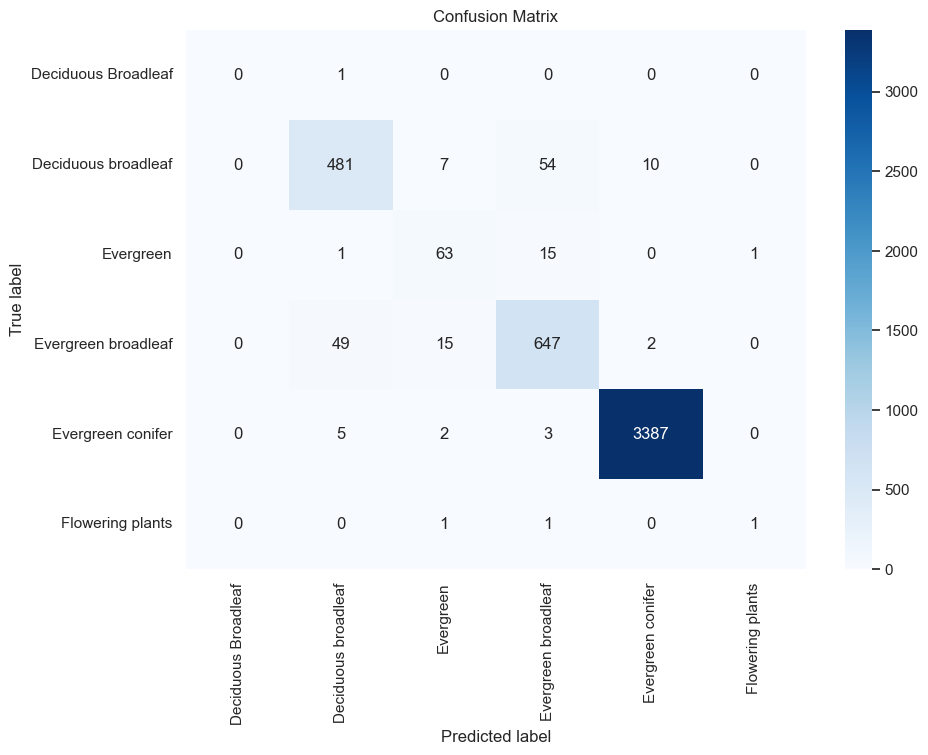

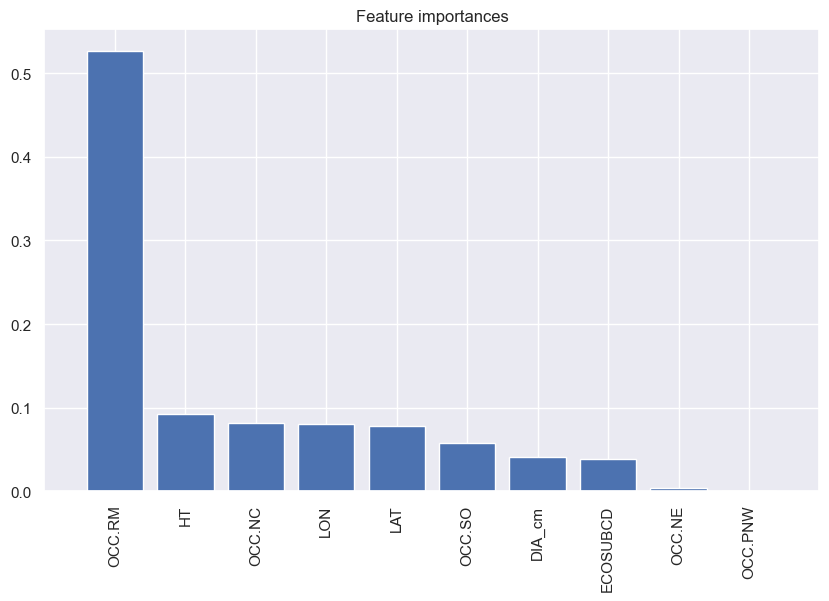

In [119]:
# Evaluate the stacked classifier on the test set
predictions = stacked_clf.predict(X_test)
# Print the classification report
print(classification_report(y_test, predictions, zero_division=0))
# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=unique_pft, yticklabels=unique_pft)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()
# Feature importance
importances = stacked_clf.named_estimators_['random_forest'].feature_importances_
feature_names = independent_variables
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), np.array(feature_names)[indices], rotation=90)
plt.xlim([-1, len(importances)])
plt.show()


In [120]:
from sklearn.ensemble import (
    StackingClassifier, 
    BaggingClassifier, 
    ExtraTreesClassifier, 
    RandomForestClassifier
)
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report

# --- Step 1: Clean and Encode Labels ---
y_train = y_train.str.strip().str.lower()
y_test = y_test.str.strip().str.lower()

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# --- Step 2: Define best base models ---
base_models = [
    ('extra_trees', ExtraTreesClassifier(
        n_estimators=100, max_depth=15, class_weight='balanced', random_state=42)),

    ('random_forest', RandomForestClassifier(
        n_estimators=100, max_depth=15, class_weight='balanced', random_state=42)),

    ('bagging', BaggingClassifier(
        n_estimators=50, random_state=42)),

    ('decision_tree', DecisionTreeClassifier(
        max_depth=10, class_weight='balanced', random_state=42))
]

# --- Step 3: Define meta-learner (XGBoost) ---
meta_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    learning_rate=0.1,
    n_estimators=100,
    max_depth=5,
    random_state=42
)

# --- Step 4: Define stacking classifier ---
stacked_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True,
    cv=StratifiedKFold(n_splits=5),
    n_jobs=-1
)

# --- Step 5: Train the stacked classifier ---
stacked_clf.fit(X_train, y_train_encoded)

# --- Step 6: Predict and Evaluate ---
y_pred = stacked_clf.predict(X_test)

print("Classification Report (Stacked Model):\n")
print(classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_))


/Users/ironman/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/ironman/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/ironman/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/ironman/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/ironman/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:1415: RuntimeWarning: Number of classes in training fold (5) d

Classification Report (Stacked Model):

                     precision    recall  f1-score   support

          broadleaf       1.00      1.00      1.00         1
deciduous broadleaf       0.92      0.88      0.90       552
          evergreen       0.81      0.80      0.81        80
evergreen broadleaf       0.91      0.94      0.93       713
  evergreen conifer       1.00      1.00      1.00      3397
   flowering plants       0.50      0.67      0.57         3

           accuracy                           0.97      4746
          macro avg       0.86      0.88      0.87      4746
       weighted avg       0.97      0.97      0.97      4746



In [47]:
from lime.lime_tabular import LimeTabularExplainer

# Train the Random Forest model with the best parameters
best_rf_model = RandomForestClassifier(
    n_estimators=200,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='log2',
    max_depth=None,
    bootstrap=False,
    random_state=42
)
best_rf_model.fit(X_train, y_train_encoded)

# Initialize LIME explainer
lime_explainer = LimeTabularExplainer(
    training_data=X_train.values,
    training_labels=y_train_encoded,
    feature_names=independent_variables,
    class_names=label_encoder.classes_,
    mode='classification'
)

# Select a sample from the test set for explanation
sample_index = 0
sample = X_test.iloc[sample_index].values
lime_exp = lime_explainer.explain_instance(
    data_row=sample,
    predict_fn=best_rf_model.predict_proba
)

# Display the explanation
lime_exp.show_in_notebook()

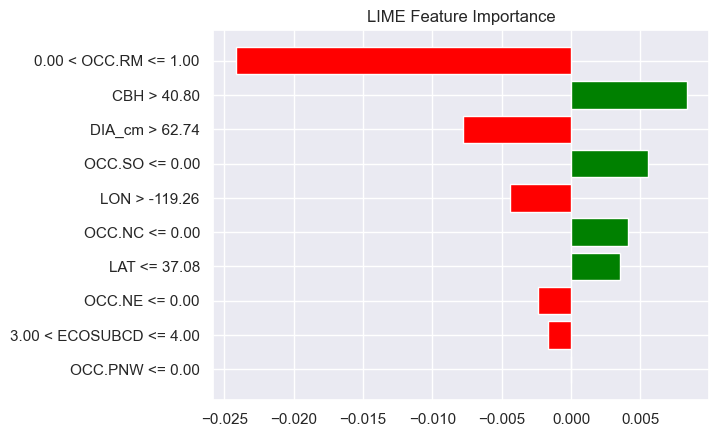

In [49]:
# Display the LIME explanation as a feature importance plot
lime_exp.as_pyplot_figure()
plt.title("LIME Feature Importance")
plt.show()


<Figure size 640x480 with 0 Axes>

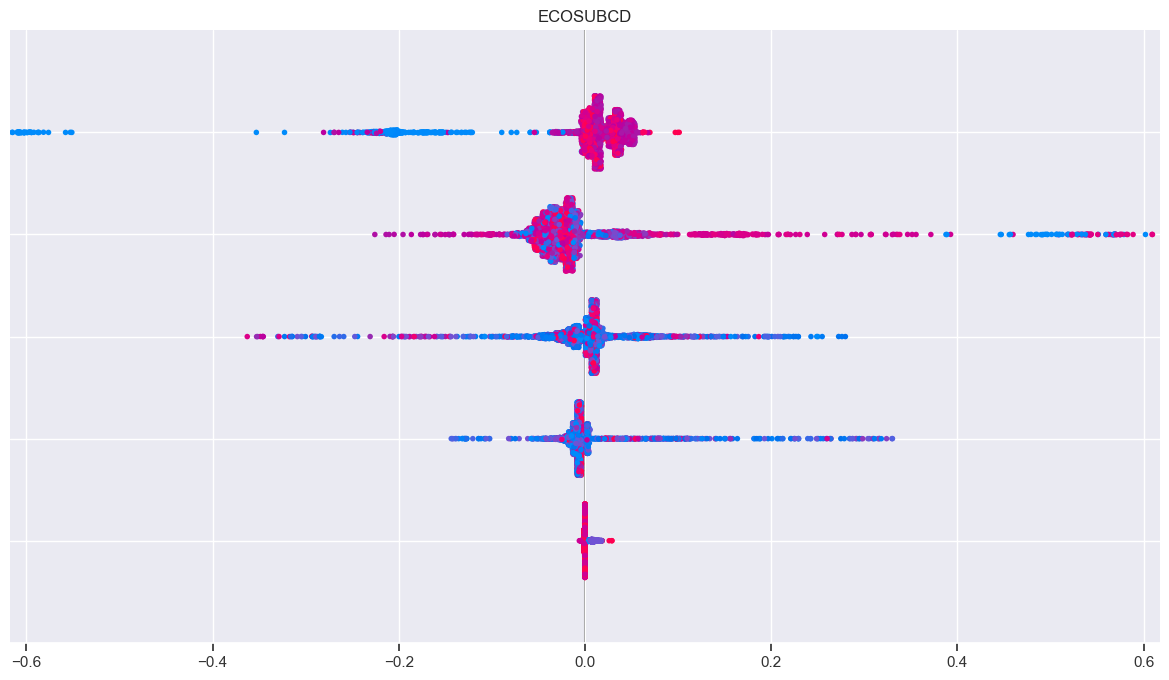

IndexError: index 10 is out of bounds for axis 0 with size 10

In [52]:
import shap

# Initialize the SHAP explainer for the best Random Forest model
explainer = shap.TreeExplainer(best_rf_model)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Visualize the SHAP summary plot
shap.summary_plot(shap_values, X_test, feature_names=independent_variables)

# Visualize the SHAP dependence plot for a specific feature (e.g., 'DIA_cm')
shap.dependence_plot('DIA_cm', shap_values[0], X_test, feature_names=independent_variables)

# Visualize the SHAP force plot for a single prediction
sample_index = 0  # Change this index to visualize other samples
shap.force_plot(
    explainer.expected_value[0],
    shap_values[0][sample_index],
    X_test.iloc[sample_index],
    feature_names=independent_variables
)

In [40]:
from sklearn.ensemble import (
    StackingClassifier, 
    BaggingClassifier, 
    ExtraTreesClassifier, 
    RandomForestClassifier
)
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import numpy as np

# --- Step 1: Encode Labels ---
y_train = y_train.str.strip().str.lower()
y_test = y_test.str.strip().str.lower()

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# --- Step 2: Define Base Models ---
base_models = [
    ('extra_trees', ExtraTreesClassifier(
        n_estimators=100, max_depth=15, class_weight='balanced', random_state=42)),

    ('random_forest', RandomForestClassifier(
        n_estimators=100, max_depth=15, class_weight='balanced', random_state=42)),

    ('bagging', BaggingClassifier(
        n_estimators=50, random_state=42)),

    ('decision_tree', DecisionTreeClassifier(
        max_depth=10, class_weight='balanced', random_state=42))
]

# --- Step 3: Define XGBoost Meta-Learner ---
xgb_base = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    objective='multi:softprob',
    num_class=len(label_encoder.classes_),
    random_state=42
)

# --- Step 4: Define Hyperparameter Search Space ---
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8, 10, 12],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'subsample': [0.5, 0.7, 0.9, 1.0],
    'colsample_bytree': [0.5, 0.7, 0.9, 1.0],
    'gamma': [0, 1, 5],
    'min_child_weight': [1, 3, 5]
}

# --- Step 5: Tune Meta-Learner with RandomizedSearchCV ---
xgb_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_dist,
    n_iter=30,
    scoring='f1_weighted',
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# --- Step 6: Build Stacking Classifier ---
stacked_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=xgb_search,
    passthrough=True,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    n_jobs=-1
)

# --- Step 7: Train the Model ---
stacked_clf.fit(X_train, y_train_encoded)

# --- Step 8: Predict and Evaluate ---
y_pred = stacked_clf.predict(X_test)

print("\n📊 Classification Report (Stacked + Tuned XGBoost):\n")
print(classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_))

# --- Step 9: Show Best XGBoost Parameters ---
print("\n🔍 Best XGBoost Meta-Learner Params:")
print(stacked_clf.final_estimator_.best_params_)


Fitting 3 folds for each of 30 candidates, totalling 90 fits


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:00:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:00:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:00:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:00:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END colsample_bytree=0.9, gamma=1, learning_rate=0.03, max_depth=12, min_child_weight=5, n_estimators=100, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.9, gamma=1, learning_rate=0.03, max_depth=12, min_child_weight=5, n_estimators=100, subsample=0.9; total time=   0.8s
[CV] END colsample_bytree=0.9, gamma=1, learning_rate=0.03, max_depth=12, min_child_weight=5, n_estimators=100, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=300, subsample=0.5; total time=   1.5s
[CV] END colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=300, subsample=0.5; total time=   1.5s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:00:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:00:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:00:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:00:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=300, subsample=0.5; total time=   1.6s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=5, n_estimators=300, subsample=0.9; total time=   1.7s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=5, n_estimators=300, subsample=0.9; total time=   1.8s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:00:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:00:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:00:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:00:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=5, n_estimators=300, subsample=0.9; total time=   1.8s
[CV] END colsample_bytree=0.9, gamma=1, learning_rate=0.1, max_depth=12, min_child_weight=1, n_estimators=300, subsample=0.9; total time=   1.1s
[CV] END colsample_bytree=0.9, gamma=5, learning_rate=0.05, max_depth=12, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   0.4s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:00:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:00:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:00:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.9, gamma=5, learning_rate=0.05, max_depth=12, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.9, gamma=1, learning_rate=0.01, max_depth=12, min_child_weight=1, n_estimators=200, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.9, gamma=5, learning_rate=0.05, max_depth=12, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   0.5s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:00:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.9, gamma=1, learning_rate=0.1, max_depth=12, min_child_weight=1, n_estimators=300, subsample=0.9; total time=   1.1s
[CV] END colsample_bytree=0.9, gamma=1, learning_rate=0.1, max_depth=12, min_child_weight=1, n_estimators=300, subsample=0.9; total time=   1.1s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:00:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:00:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.9, gamma=1, learning_rate=0.01, max_depth=12, min_child_weight=1, n_estimators=200, subsample=1.0; total time=   1.9s
[CV] END colsample_bytree=0.9, gamma=1, learning_rate=0.01, max_depth=12, min_child_weight=1, n_estimators=200, subsample=1.0; total time=   2.0s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:00:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:00:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=5, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.9, gamma=1, learning_rate=0.05, max_depth=12, min_child_weight=5, n_estimators=300, subsample=0.9; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=5, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=5, n_estimators=300, subsample=0.9; total time=   1.7s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=5, n_estimators=300, subsample=0.9; total time=   1.8s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:00:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:00:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:00:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:00:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=5, n_estimators=300, subsample=0.9; total time=   1.8s
[CV] END colsample_bytree=0.9, gamma=1, learning_rate=0.05, max_depth=12, min_child_weight=5, n_estimators=300, subsample=0.9; total time=   1.4s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:00:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:00:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.9, gamma=1, learning_rate=0.05, max_depth=12, min_child_weight=5, n_estimators=300, subsample=0.9; total time=   1.3s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:00:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=5, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.9; total time=   0.8s
[CV] END colsample_bytree=0.5, gamma=5, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.5, gamma=5, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=0.5, gamma=5, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, subsample=0.7; total time=   0.9s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:00:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:00:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:00:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:00:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=5, n_estimators=300, subsample=0.9; total time=   2.5s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=5, n_estimators=300, subsample=0.9; total time=   2.6s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:00:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:00:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:00:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=5, n_estimators=300, subsample=0.9; total time=   2.6s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:00:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   1.4s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:00:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   1.3s
[CV] END colsample_bytree=0.9, gamma=1, learning_rate=0.03, max_depth=8, min_child_weight=3, n_estimators=200, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=0.9, gamma=1, learning_rate=0.03, max_depth=8, min_child_weight=3, n_estimators=200, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=0.9, gamma=1, learning_rate=0.03, max_depth=8, min_child_weight=3, n_estimators=200, subsample=1.0; total time=   1.3s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:00:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:00:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:00:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:00:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END colsample_bytree=0.9, gamma=5, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=100, subsample=0.5; total time=   0.4s
[CV] END colsample_bytree=0.9, gamma=5, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=100, subsample=0.5; total time=   0.4s
[CV] END colsample_bytree=0.9, gamma=5, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=100, subsample=0.5; total time=   0.4s
[CV] END colsample_bytree=0.9, gamma=1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=300, subsample=1.0; total time=   1.5s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:00:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:00:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:00:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:00:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END colsample_bytree=0.9, gamma=1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=300, subsample=1.0; total time=   1.5s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:00:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.03, max_depth=8, min_child_weight=3, n_estimators=300, subsample=0.7; total time=   2.3s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.03, max_depth=8, min_child_weight=3, n_estimators=300, subsample=0.7; total time=   2.3s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.03, max_depth=8, min_child_weight=3, n_estimators=300, subsample=0.7; total time=   2.3s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:00:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:00:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:00:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.9, gamma=1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=300, subsample=1.0; total time=   1.5s
[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.05, max_depth=12, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.9, gamma=5, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, subsample=0.5; total time=   0.4s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:00:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:00:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:00:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=8, min_child_weight=5, n_estimators=300, subsample=0.5; total time=   1.4s
[CV] END colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=8, min_child_weight=5, n_estimators=300, subsample=0.5; total time=   1.4s
[CV] END colsample_bytree=0.9, gamma=5, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, subsample=0.5; total time=   0.4s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.05, max_depth=12, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.05, max_depth=12, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   0.7s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:00:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:00:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:00:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:00:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END colsample_bytree=0.9, gamma=5, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, subsample=0.5; total time=   0.4s
[CV] END colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=8, min_child_weight=5, n_estimators=300, subsample=0.5; total time=   1.5s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, subsample=1.0; total time=   1.4s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:00:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:00:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:00:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:00:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.5, gamma=5, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=200, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.9; total time=   0.8s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:00:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:00:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:00:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:00:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END colsample_bytree=0.5, gamma=5, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=200, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.5, gamma=5, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=200, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.9; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   0.7s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:00:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:00:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:00:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:00:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.03, max_depth=4, min_child_weight=1, n_estimators=300, subsample=0.7; total time=   1.6s
[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=200, subsample=0.7; total time=   1.5s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.03, max_depth=4, min_child_weight=1, n_estimators=300, subsample=0.7; total time=   1.6s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=300, subsample=0.9; total time=   1.6s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.03, max_depth=4, min_child_weight=1, n_estimators=300, subsample=0.7; total time=   1.8s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=300, subsample=0.9; total time=   1.7s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=300, subsample=1.0; total 

/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:00:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:00:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:00:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:00:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=300, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=0.5, gamma=5, learning_rate=0.05, max_depth=8, min_child_weight=5, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=300, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=0.5, gamma=5, learning_rate=0.05, max_depth=8, min_child_weight=5, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.5, gamma=5, learning_rate=0.05, max_depth=8, min_child_weight=5, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.03, max_depth=12, min_child_weight=3, n_estimators=100, subsample=0.9; total time=   0.8s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.03, max_depth=12, min_child_weight=3, n_estimators=100, subsample=0.9; tota

In [41]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import numpy as np

# --- Label Encode ---
y_train = y_train.str.strip().str.lower()
y_test = y_test.str.strip().str.lower()
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# --- Tune Base Models ---
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Random Forest
rf_search = RandomizedSearchCV(
    RandomForestClassifier(class_weight='balanced', random_state=42),
    param_distributions={
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 15, 20],
        'min_samples_split': [2, 5, 10]
    },
    n_iter=10,
    scoring='f1_weighted',
    cv=cv,
    n_jobs=-1,
    random_state=42,
    verbose=1
)
rf_search.fit(X_train, y_train_encoded)

# Extra Trees
et_search = RandomizedSearchCV(
    ExtraTreesClassifier(class_weight='balanced', random_state=42),
    param_distributions={
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 15, 20],
        'min_samples_split': [2, 5, 10]
    },
    n_iter=10,
    scoring='f1_weighted',
    cv=cv,
    n_jobs=-1,
    random_state=42,
    verbose=1
)
et_search.fit(X_train, y_train_encoded)

# Decision Tree
dt_search = RandomizedSearchCV(
    DecisionTreeClassifier(class_weight='balanced', random_state=42),
    param_distributions={
        'max_depth': [5, 10, 15],
        'min_samples_split': [2, 5, 10]
    },
    n_iter=5,
    scoring='f1_weighted',
    cv=cv,
    n_jobs=-1,
    random_state=42,
    verbose=1
)
dt_search.fit(X_train, y_train_encoded)

# Bagging (no tuning for now)
bagging = BaggingClassifier(n_estimators=50, random_state=42)

# --- Define Base Models (Tuned) ---
base_models = [
    ('extra_trees', et_search.best_estimator_),
    ('random_forest', rf_search.best_estimator_),
    ('bagging', bagging),
    ('decision_tree', dt_search.best_estimator_)
]

# --- Define and Tune Meta-Learner (XGBoost) ---
xgb_base = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    objective='multi:softprob',
    num_class=len(label_encoder.classes_),
    random_state=42
)

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8, 10, 12],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'subsample': [0.5, 0.7, 0.9, 1.0],
    'colsample_bytree': [0.5, 0.7, 0.9, 1.0],
    'gamma': [0, 1, 5],
    'min_child_weight': [1, 3, 5]
}

xgb_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_dist,
    n_iter=30,
    scoring='f1_weighted',
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# --- Build Stacking Classifier ---
stacked_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=xgb_search,
    passthrough=True,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    n_jobs=-1
)

# --- Train ---
stacked_clf.fit(X_train, y_train_encoded)

# --- Evaluate ---
y_pred = stacked_clf.predict(X_test)
print("\n📊 Classification Report (Tuned Base Models + Tuned XGBoost Meta):\n")
print(classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_))

# --- Show best params ---
print("\n🔍 Best Meta-Learner Params:\n", stacked_clf.final_estimator_.best_params_)
print("\n✅ Best Base Model Params:")
print("Random Forest:", rf_search.best_params_)
print("Extra Trees:", et_search.best_params_)
print("Decision Tree:", dt_search.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Fitting 3 folds for each of 30 candidates, totalling 90 fits


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:01:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:01:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:01:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:01:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END colsample_bytree=0.9, gamma=1, learning_rate=0.03, max_depth=12, min_child_weight=5, n_estimators=100, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.9, gamma=1, learning_rate=0.03, max_depth=12, min_child_weight=5, n_estimators=100, subsample=0.9; total time=   0.8s
[CV] END colsample_bytree=0.9, gamma=1, learning_rate=0.03, max_depth=12, min_child_weight=5, n_estimators=100, subsample=0.9; total time=   0.8s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:01:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:01:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:01:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=300, subsample=0.5; total time=   1.6s
[CV] END colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=300, subsample=0.5; total time=   1.7s
[CV] END colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=300, subsample=0.5; total time=   1.7s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:01:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:01:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:01:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=5, n_estimators=300, subsample=0.9; total time=   1.8s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=5, n_estimators=300, subsample=0.9; total time=   1.9s
[CV] END colsample_bytree=0.9, gamma=1, learning_rate=0.1, max_depth=12, min_child_weight=1, n_estimators=300, subsample=0.9; total time=   1.1s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=5, n_estimators=300, subsample=0.9; total time=   1.9s
[CV] END colsample_bytree=0.9, gamma=1, learning_rate=0.1, max_depth=12, min_child_weight=1, n_estimators=300, subsample=0.9; total time=   1.1s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:01:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:01:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:01:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:01:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END colsample_bytree=0.9, gamma=1, learning_rate=0.01, max_depth=12, min_child_weight=1, n_estimators=200, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=0.9, gamma=1, learning_rate=0.01, max_depth=12, min_child_weight=1, n_estimators=200, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=0.9, gamma=5, learning_rate=0.05, max_depth=12, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.9, gamma=5, learning_rate=0.05, max_depth=12, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   0.4s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:01:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:01:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:01:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:01:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END colsample_bytree=0.9, gamma=5, learning_rate=0.05, max_depth=12, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   0.5s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:01:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.9, gamma=1, learning_rate=0.01, max_depth=12, min_child_weight=1, n_estimators=200, subsample=1.0; total time=   1.8s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:01:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.9, gamma=1, learning_rate=0.1, max_depth=12, min_child_weight=1, n_estimators=300, subsample=0.9; total time=   1.2s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:01:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=5, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.9; total time=   0.9s
[CV] END colsample_bytree=0.9, gamma=1, learning_rate=0.05, max_depth=12, min_child_weight=5, n_estimators=300, subsample=0.9; total time=   1.5s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:01:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:01:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=5, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.9; total time=   0.9s
[CV] END colsample_bytree=0.9, gamma=1, learning_rate=0.05, max_depth=12, min_child_weight=5, n_estimators=300, subsample=0.9; total time=   1.6s
[CV] END colsample_bytree=0.9, gamma=1, learning_rate=0.05, max_depth=12, min_child_weight=5, n_estimators=300, subsample=0.9; total time=   1.5s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:01:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:01:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:01:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=5, n_estimators=300, subsample=0.9; total time=   2.2s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=5, n_estimators=300, subsample=0.9; total time=   2.2s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=5, n_estimators=300, subsample=0.9; total time=   2.2s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:01:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:01:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:01:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=5, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.9; total time=   0.9s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:01:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:01:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.5, gamma=5, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, subsample=0.7; total time=   0.9s
[CV] END colsample_bytree=0.5, gamma=5, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, subsample=0.7; total time=   0.9s
[CV] END colsample_bytree=0.5, gamma=5, learning_rate=0.03, max_depth=6, min_child_weight=5, n_estimators=200, subsample=0.7; total time=   1.0s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:01:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:01:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:01:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.5, gamma=1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=5, n_estimators=300, subsample=0.9; total time=   2.9s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:01:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:01:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:01:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=5, n_estimators=300, subsample=0.9; total time=   3.1s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=5, n_estimators=300, subsample=0.9; total time=   3.1s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:01:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:01:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   1.5s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   1.6s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:01:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:01:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   1.6s
[CV] END colsample_bytree=0.9, gamma=1, learning_rate=0.03, max_depth=8, min_child_weight=3, n_estimators=200, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=0.9, gamma=1, learning_rate=0.03, max_depth=8, min_child_weight=3, n_estimators=200, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=0.9, gamma=1, learning_rate=0.03, max_depth=8, min_child_weight=3, n_estimators=200, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=0.9, gamma=5, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=100, subsample=0.5; total time=   0.4s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:01:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:01:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:01:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:01:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END colsample_bytree=0.9, gamma=5, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=100, subsample=0.5; total time=   0.5s
[CV] END colsample_bytree=0.9, gamma=5, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=100, subsample=0.5; total time=   0.4s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:01:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:01:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.9, gamma=1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=300, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.9, gamma=1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=300, subsample=1.0; total time=   1.8s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:01:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:01:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.03, max_depth=8, min_child_weight=3, n_estimators=300, subsample=0.7; total time=   2.6s
[CV] END colsample_bytree=0.9, gamma=1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=300, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.03, max_depth=8, min_child_weight=3, n_estimators=300, subsample=0.7; total time=   2.7s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:01:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:01:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:01:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.03, max_depth=8, min_child_weight=3, n_estimators=300, subsample=0.7; total time=   2.8s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:01:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.9, gamma=5, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, subsample=0.5; total time=   0.4s
[CV] END colsample_bytree=0.9, gamma=5, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, subsample=0.5; total time=   0.4s
[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.05, max_depth=12, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   0.9s
[CV] END colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=8, min_child_weight=5, n_estimators=300, subsample=0.5; total time=   1.6s
[CV] END colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=8, min_child_weight=5, n_estimators=300, subsample=0.5; total time=   1.7s
[CV] END colsample_bytree=0.5, gamma=1, learning_rate=0.05, max_depth=8, min_child_weight=5, n_estimators=300, subsample=0.5; total time=   1.7s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:01:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:01:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:01:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:01:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.05, max_depth=12, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.05, max_depth=12, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.9, gamma=5, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=100, subsample=0.5; total time=   0.4s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, subsample=1.0; total time=   1.6s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:01:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:01:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:01:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:01:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.03, max_depth=6, min_child_weight=3, n_estimators=200, subsample=1.0; total time=   1.7s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.9; total time=   0.7s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.9; total time=   0.8s
[CV] END colsample_bytree=0.5, gamma=5, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=200, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   0.7s[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.9; total 

/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:01:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:01:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:01:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:01:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=0.5, gamma=5, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=200, subsample=1.0; total time=   0.6s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:01:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:01:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=200, subsample=0.7; total time=   1.3s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=300, subsample=0.9; total time=   1.4s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.03, max_depth=4, min_child_weight=1, n_estimators=300, subsample=0.7; total time=   1.5s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=300, subsample=0.9; total time=   1.5s
[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=200, subsample=0.7; total time=   1.4s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.03, max_depth=4, min_child_weight=1, n_estimators=300, subsample=0.7; total time=   1.6s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:01:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:01:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:01:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:01:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.03, max_depth=4, min_child_weight=1, n_estimators=300, subsample=0.7; total time=   1.6s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=300, subsample=0.9; total time=   1.6s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=300, subsample=1.0; total time=   2.1s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [15:01:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=300, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=0.5, gamma=5, learning_rate=0.05, max_depth=8, min_child_weight=5, n_estimators=100, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.5, gamma=5, learning_rate=0.05, max_depth=8, min_child_weight=5, n_estimators=100, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.5, gamma=5, learning_rate=0.05, max_depth=8, min_child_weight=5, n_estimators=100, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=300, subsample=1.0; total time=   2.0s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.03, max_depth=12, min_child_weight=3, n_estimators=100, subsample=0.9; total time=   1.0s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.03, max_depth=12, min_child_weight=3, n_estimators=100, subsample=0.9; tota

In [42]:
import numpy as np
from sklearn.ensemble import (
    RandomForestClassifier,
    ExtraTreesClassifier,
    BaggingClassifier,
    StackingClassifier
)
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Add to base models
# --- Step 1: Label Encoding ---
y_train = y_train.str.strip().str.lower()
y_test = y_test.str.strip().str.lower()

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

#  Define Tuned Base Models ---
base_models = [
    ('extra_trees', ExtraTreesClassifier(
        n_estimators=100, max_depth=20, min_samples_split=5,
        class_weight='balanced', random_state=42)),
    
    ('random_forest', RandomForestClassifier(
        n_estimators=100, max_depth=20, min_samples_split=5,
        class_weight='balanced', random_state=42)),
    
    ('bagging', BaggingClassifier(
        n_estimators=50, random_state=42)),

    ('decision_tree', DecisionTreeClassifier(
        max_depth=15, min_samples_split=5, class_weight='balanced', random_state=42)),
    
('lightgbm', LGBMClassifier(n_estimators=100, max_depth=10, class_weight='balanced', random_state=42)),
('catboost', CatBoostClassifier(iterations=100, depth=10, learning_rate=0.05, verbose=0))
]

#  Define Tuned Meta-Learner (XGBoost) ---
xgb_meta = XGBClassifier(
    objective='multi:softprob',
    eval_metric='mlogloss',
    use_label_encoder=False,
    num_class=len(label_encoder.classes_),
    learning_rate=0.05,
    max_depth=12,
    min_child_weight=1,
    subsample=0.7,
    colsample_bytree=0.9,
    gamma=5,
    n_estimators=100,
    random_state=42
)

# --- Step 4: Define and Train Stacking Classifier ---
stacked_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=xgb_meta,
    passthrough=True,
    cv=StratifiedKFold(n_splits=6, shuffle=True, random_state=42),
    n_jobs=-1
)

stacked_clf.fit(X_train, y_train_encoded)

# --- Step 5: Predict & Evaluate ---
y_pred = stacked_clf.predict(X_test)


y_train_pred = stacked_clf.predict(X_train)
print("📊 Classification Report (Train):\n")
print(classification_report(y_train_encoded, y_train_pred, target_names=label_encoder.classes_))

print("📊 Classification Report (Final Stacked Model):\n")
print(classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001128 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 16109, number of used features: 9
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


KeyboardInterrupt: 

In [121]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import numpy as np
from scipy.stats import randint, uniform

# --- Label Encode ---
y_train = y_train.str.strip().str.lower()
y_test = y_test.str.strip().str.lower()
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# --- Tune Base Models ---
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # Increased from 3 to 5 folds

# Random Forest - Expanded parameter space
rf_param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(10, 30),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy', 'log_loss']
}

rf_search = RandomizedSearchCV(
    RandomForestClassifier(class_weight='balanced', random_state=42),
    param_distributions=rf_param_dist,
    n_iter=20,  # Increased from 10 to 20
    scoring='f1_weighted',
    cv=cv,
    n_jobs=-1,
    random_state=42,
    verbose=1
)
rf_search.fit(X_train, y_train_encoded)

# Extra Trees - Expanded parameter space
et_param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(10, 30),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy', 'log_loss']
}

et_search = RandomizedSearchCV(
    ExtraTreesClassifier(class_weight='balanced', random_state=42),
    param_distributions=et_param_dist,
    n_iter=20,  # Increased from 10 to 20
    scoring='f1_weighted',
    cv=cv,
    n_jobs=-1,
    random_state=42,
    verbose=1
)
et_search.fit(X_train, y_train_encoded)

# Decision Tree - Expanded parameter space
dt_param_dist = {
    'max_depth': randint(5, 25),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random']
}

dt_search = RandomizedSearchCV(
    DecisionTreeClassifier(class_weight='balanced', random_state=42),
    param_distributions=dt_param_dist,
    n_iter=15,  # Increased from 5 to 15
    scoring='f1_weighted',
    cv=cv,
    n_jobs=-1,
    random_state=42,
    verbose=1
)
dt_search.fit(X_train, y_train_encoded)

# Bagging - Now with parameter tuning
# Using 'estimator' instead of 'base_estimator' for newer scikit-learn versions
bagging_param_dist = {
    'n_estimators': randint(10, 100),
    'max_samples': uniform(0.5, 0.5),  # 0.5 to 1.0
    'max_features': uniform(0.5, 0.5),  # 0.5 to 1.0
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}

# Create a base tree classifier to use as the estimator
base_dt = DecisionTreeClassifier(random_state=42)

# Initialize BaggingClassifier with the estimator
bagging_clf = BaggingClassifier(random_state=42)
# Set the estimator separately to handle compatibility with different sklearn versions
try:
    # For newer versions (1.0+)
    bagging_clf.estimator = base_dt
except AttributeError:
    # For older versions
    bagging_clf.base_estimator = base_dt

bagging_search = RandomizedSearchCV(
    bagging_clf,
    param_distributions=bagging_param_dist,
    n_iter=15,
    scoring='f1_weighted',
    cv=cv,
    n_jobs=-1,
    random_state=42,
    verbose=1
)
bagging_search.fit(X_train, y_train_encoded)

# --- Define Base Models (Tuned) ---
base_models = [
    ('extra_trees', et_search.best_estimator_),
    ('random_forest', rf_search.best_estimator_),
    ('bagging', bagging_search.best_estimator_),
    ('decision_tree', dt_search.best_estimator_)
]

# --- Define and Tune Meta-Learner (XGBoost) ---
xgb_base = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    objective='multi:softprob',
    num_class=len(label_encoder.classes_),
    random_state=42
)

# Expanded XGBoost parameter space
xgb_param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 15),
    'learning_rate': uniform(0.01, 0.29),  # 0.01 to 0.3
    'subsample': uniform(0.5, 0.5),  # 0.5 to 1.0
    'colsample_bytree': uniform(0.5, 0.5),  # 0.5 to 1.0
    'gamma': uniform(0, 5),
    'min_child_weight': randint(1, 10),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1)
}

# Remove parameters that might not be compatible with your XGBoost version
# Uncomment the following lines if you want to use them and your version supports them
# xgb_param_dist['colsample_bylevel'] = uniform(0.5, 0.5)
# xgb_param_dist['colsample_bynode'] = uniform(0.5, 0.5)
# xgb_param_dist['scale_pos_weight'] = [1, 'balanced']

xgb_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=xgb_param_dist,
    n_iter=50,  # Increased from 30 to 50
    scoring='f1_weighted',
    cv=5,  # Increased from 3 to 5
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# --- Build Stacking Classifier ---
stacked_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=xgb_search,
    passthrough=True,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    n_jobs=-1,
    stack_method='predict_proba'
)

# --- Train ---
stacked_clf.fit(X_train, y_train_encoded)

# --- Evaluate ---
y_pred = stacked_clf.predict(X_test)
print("\n📊 Classification Report (Tuned Base Models + Tuned XGBoost Meta):\n")
print(classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_))

# --- Show best params ---
print("\n🔍 Best Meta-Learner Params:\n", stacked_clf.final_estimator_.best_params_)
print("\n✅ Best Base Model Params:")
print("Random Forest:", rf_search.best_params_)
print("Extra Trees:", et_search.best_params_)
print("Decision Tree:", dt_search.best_params_)
print("Bagging:", bagging_search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Fitting 5 folds for each of 15 candidates, totalling 75 fits


/Users/ironman/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/ironman/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/ironman/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/ironman/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/ironman/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:1415: RuntimeWarning: Number of classes in training fold (5) d

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END colsample_bytree=0.6872700594236812, gamma=4.75357153204958, learning_rate=0.22227824312530747, max_depth=7, min_child_weight=7, n_estimators=221, reg_alpha=0.15599452033620265, reg_lambda=0.05808361216819946, subsample=0.9330880728874675; total time=   0.0s
[CV] END colsample_bytree=0.8005575058716043, gamma=3.540362888980227, learning_rate=0.01596950334578271, max_depth=4, min_child_weight=8, n_estimators=393, reg_alpha=0.0007787658410143283, reg_lambda=0.9922115592912175, subsample=0.8087407548138583; total time=   0.0s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END colsample_bytree=0.6872700594236812, gamma=4.75357153204958, learning_rate=0.22227824312530747, max_depth=7, min_child_weight=7, n_estimators=221, reg_alpha=0.15599452033620265, reg_lambda=0.05808361216819946, subsample=0.9330880728874675; total time=   0.8s
[CV] END colsample_bytree=0.6872700594236812, gamma=4.75357153204958, learning_rate=0.22227824312530747, max_depth=7, min_child_weight=7, n_estimators=221, reg_alpha=0.15599452033620265, reg_lambda=0.05808361216819946, subsample=0.9330880728874675; total time=   0.9s
[CV] END colsample_bytree=0.8058265802441404, gamma=0.03533152609858703, learning_rate=0.01668810326201057, max_depth=13, min_child_weight=3, n_estimators=463, reg_alpha=0.5142344384136116, reg_lambda=0.5924145688620425, subsample=0.5232252063599989; total time=   0.0s
[CV] END colsample_bytree=0.6872700594236812, gamma=4.75357153204958, learning_rate=0.22227824312530747, max_depth=7, min_child_weight=7, n_estimators=221, reg_alpha=0.15599452033620265, reg_lam

/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END colsample_bytree=0.8005575058716043, gamma=3.540362888980227, learning_rate=0.01596950334578271, max_depth=4, min_child_weight=8, n_estimators=393, reg_alpha=0.0007787658410143283, reg_lambda=0.9922115592912175, subsample=0.8087407548138583; total time=   2.3s
[CV] END colsample_bytree=0.8005575058716043, gamma=3.540362888980227, learning_rate=0.01596950334578271, max_depth=4, min_child_weight=8, n_estimators=393, reg_alpha=0.0007787658410143283, reg_lambda=0.9922115592912175, subsample=0.8087407548138583; total time=   2.3s
[CV] END colsample_bytree=0.8037724259507192, gamma=0.8526206184364576, learning_rate=0.02886496196573106, max_depth=6, min_child_weight=9, n_estimators=415, reg_alpha=0.5632882178455393, reg_lambda=0.3854165025399161, subsample=0.5079831261101071; total time=   0.0s
[CV] END colsample_bytree=0.8005575058716043, gamma=3.540362888980227, learning_rate=0.01596950334578271, max_depth=4, min_child_weight=8, n_estimators=393, reg_alpha=0.0007787658410143283, re

/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END colsample_bytree=0.6154469128110744, gamma=1.2051273301300585, learning_rate=0.2081464204593829, max_depth=14, min_child_weight=8, n_estimators=134, reg_alpha=0.9093204020787821, reg_lambda=0.2587799816000169, subsample=0.831261142176991; total time=   0.7s
[CV] END colsample_bytree=0.6154469128110744, gamma=1.2051273301300585, learning_rate=0.2081464204593829, max_depth=14, min_child_weight=8, n_estimators=134, reg_alpha=0.9093204020787821, reg_lambda=0.2587799816000169, subsample=0.831261142176991; total time=   0.7s
[CV] END colsample_bytree=0.6154469128110744, gamma=1.2051273301300585, learning_rate=0.2081464204593829, max_depth=14, min_child_weight=8, n_estimators=134, reg_alpha=0.9093204020787821, reg_lambda=0.2587799816000169, subsample=0.831261142176991; total time=   0.0s
[CV] END colsample_bytree=0.6154469128110744, gamma=1.2051273301300585, learning_rate=0.2081464204593829, max_depth=14, min_child_weight=8, n_estimators=134, reg_alpha=0.9093204020787821, reg_lambda=

/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6154469128110744, gamma=1.2051273301300585, learning_rate=0.2081464204593829, max_depth=14, min_child_weight=8, n_estimators=134, reg_alpha=0.9093204020787821, reg_lambda=0.2587799816000169, subsample=0.831261142176991; total time=   0.7s
[CV] END colsample_bytree=0.8037724259507192, gamma=0.8526206184364576, learning_rate=0.02886496196573106, max_depth=6, min_child_weight=9, n_estimators=415, reg_alpha=0.5632882178455393, reg_lambda=0.3854165025399161, subsample=0.5079831261101071; total time=   3.0s
[CV] END colsample_bytree=0.8037724259507192, gamma=0.8526206184364576, learning_rate=0.02886496196573106, max_depth=6, min_child_weight=9, n_estimators=415, reg_alpha=0.5632882178455393, reg_lambda=0.3854165025399161, subsample=0.5079831261101071; total time=   3.1s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8037724259507192, gamma=0.8526206184364576, learning_rate=0.02886496196573106, max_depth=6, min_child_weight=9, n_estimators=415, reg_alpha=0.5632882178455393, reg_lambda=0.3854165025399161, subsample=0.5079831261101071; total time=   3.2s
[CV] END colsample_bytree=0.8636359979282104, gamma=1.632703844029177, learning_rate=0.17542875257756582, max_depth=14, min_child_weight=9, n_estimators=289, reg_alpha=0.32533033076326434, reg_lambda=0.388677289689482, subsample=0.6356745158869479; total time=   0.0s
[CV] END colsample_bytree=0.6558555380447055, gamma=2.600340105889054, learning_rate=0.1685459810095511, max_depth=8, min_child_weight=2, n_estimators=317, reg_alpha=0.44975413336976566, reg_lambda=0.3951502360018144, subsample=0.9633294328968971; total time=   1.3s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6558555380447055, gamma=2.600340105889054, learning_rate=0.1685459810095511, max_depth=8, min_child_weight=2, n_estimators=317, reg_alpha=0.44975413336976566, reg_lambda=0.3951502360018144, subsample=0.9633294328968971; total time=   1.5s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8058265802441404, gamma=0.03533152609858703, learning_rate=0.01668810326201057, max_depth=13, min_child_weight=3, n_estimators=463, reg_alpha=0.5142344384136116, reg_lambda=0.5924145688620425, subsample=0.5232252063599989; total time=   4.9s
[CV] END colsample_bytree=0.8058265802441404, gamma=0.03533152609858703, learning_rate=0.01668810326201057, max_depth=13, min_child_weight=3, n_estimators=463, reg_alpha=0.5142344384136116, reg_lambda=0.5924145688620425, subsample=0.5232252063599989; total time=   5.1s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6558555380447055, gamma=2.600340105889054, learning_rate=0.1685459810095511, max_depth=8, min_child_weight=2, n_estimators=317, reg_alpha=0.44975413336976566, reg_lambda=0.3951502360018144, subsample=0.9633294328968971; total time=   1.4s
[CV] END colsample_bytree=0.6558555380447055, gamma=2.600340105889054, learning_rate=0.1685459810095511, max_depth=8, min_child_weight=2, n_estimators=317, reg_alpha=0.44975413336976566, reg_lambda=0.3951502360018144, subsample=0.9633294328968971; total time=   0.0s
[CV] END colsample_bytree=0.9143687545759647, gamma=1.7837666334679465, learning_rate=0.09147100780934041, max_depth=14, min_child_weight=9, n_estimators=256, reg_alpha=0.8021969807540397, reg_lambda=0.07455064367977082, subsample=0.9934434683002586; total time=   1.2s
[CV] END colsample_bytree=0.8861223846483287, gamma=0.993578407670862, learning_rate=0.011601413965844696, max_depth=13, min_child_weight=3, n_estimators=180, reg_alpha=0.71134195274865, reg_lambd

/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8037724259507192, gamma=0.8526206184364576, learning_rate=0.02886496196573106, max_depth=6, min_child_weight=9, n_estimators=415, reg_alpha=0.5632882178455393, reg_lambda=0.3854165025399161, subsample=0.5079831261101071; total time=   3.2s
[CV] END colsample_bytree=0.8636359979282104, gamma=1.632703844029177, learning_rate=0.17542875257756582, max_depth=14, min_child_weight=9, n_estimators=289, reg_alpha=0.32533033076326434, reg_lambda=0.388677289689482, subsample=0.6356745158869479; total time=   1.6s
[CV] END colsample_bytree=0.8636359979282104, gamma=1.632703844029177, learning_rate=0.17542875257756582, max_depth=14, min_child_weight=9, n_estimators=289, reg_alpha=0.32533033076326434, reg_lambda=0.388677289689482, subsample=0.6356745158869479; total time=   1.5s
[CV] END colsample_bytree=0.9143687545759647, gamma=1.7837666334679465, learning_rate=0.09147100780934041, max_depth=14, min_child_weight=9, n_estimators=256, reg_alpha=0.8021969807540397, reg_lam

/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END colsample_bytree=0.6558555380447055, gamma=2.600340105889054, learning_rate=0.1685459810095511, max_depth=8, min_child_weight=2, n_estimators=317, reg_alpha=0.44975413336976566, reg_lambda=0.3951502360018144, subsample=0.9633294328968971; total time=   1.4s
[CV] END colsample_bytree=0.8058265802441404, gamma=0.03533152609858703, learning_rate=0.01668810326201057, max_depth=13, min_child_weight=3, n_estimators=463, reg_alpha=0.5142344384136116, reg_lambda=0.5924145688620425, subsample=0.5232252063599989; total time=   5.2s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.9143687545759647, gamma=1.7837666334679465, learning_rate=0.09147100780934041, max_depth=14, min_child_weight=9, n_estimators=256, reg_alpha=0.8021969807540397, reg_lambda=0.07455064367977082, subsample=0.9934434683002586; total time=   1.2s
[CV] END colsample_bytree=0.9143687545759647, gamma=1.7837666334679465, learning_rate=0.09147100780934041, max_depth=14, min_child_weight=9, n_estimators=256, reg_alpha=0.8021969807540397, reg_lambda=0.07455064367977082, subsample=0.9934434683002586; total time=   0.0s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8058265802441404, gamma=0.03533152609858703, learning_rate=0.01668810326201057, max_depth=13, min_child_weight=3, n_estimators=463, reg_alpha=0.5142344384136116, reg_lambda=0.5924145688620425, subsample=0.5232252063599989; total time=   4.9s
[CV] END colsample_bytree=0.6625916610133735, gamma=3.64803089169032, learning_rate=0.1948916666930118, max_depth=13, min_child_weight=3, n_estimators=326, reg_alpha=0.1195942459383017, reg_lambda=0.713244787222995, subsample=0.8803925243084487; total time=   0.0s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8861223846483287, gamma=0.993578407670862, learning_rate=0.011601413965844696, max_depth=13, min_child_weight=3, n_estimators=180, reg_alpha=0.71134195274865, reg_lambda=0.7901755405312056, subsample=0.8029799873905057; total time=   1.6s
[CV] END colsample_bytree=0.9143687545759647, gamma=1.7837666334679465, learning_rate=0.09147100780934041, max_depth=14, min_child_weight=9, n_estimators=256, reg_alpha=0.8021969807540397, reg_lambda=0.07455064367977082, subsample=0.9934434683002586; total time=   1.2s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8861223846483287, gamma=0.993578407670862, learning_rate=0.011601413965844696, max_depth=13, min_child_weight=3, n_estimators=180, reg_alpha=0.71134195274865, reg_lambda=0.7901755405312056, subsample=0.8029799873905057; total time=   1.7s
[CV] END colsample_bytree=0.8636359979282104, gamma=1.632703844029177, learning_rate=0.17542875257756582, max_depth=14, min_child_weight=9, n_estimators=289, reg_alpha=0.32533033076326434, reg_lambda=0.388677289689482, subsample=0.6356745158869479; total time=   1.5s
[CV] END colsample_bytree=0.8636359979282104, gamma=1.632703844029177, learning_rate=0.17542875257756582, max_depth=14, min_child_weight=9, n_estimators=289, reg_alpha=0.32533033076326434, reg_lambda=0.388677289689482, subsample=0.6356745158869479; total time=   1.6s
[CV] END colsample_bytree=0.9631504392566745, gamma=3.2553851275097223, learning_rate=0.2753383059076964, max_depth=11, min_child_weight=8, n_estimators=367, reg_alpha=0.3308980248526492, reg_lambd

/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END colsample_bytree=0.9631504392566745, gamma=3.2553851275097223, learning_rate=0.2753383059076964, max_depth=11, min_child_weight=8, n_estimators=367, reg_alpha=0.3308980248526492, reg_lambda=0.06355835028602363, subsample=0.6554911608578311; total time=   1.7s
[CV] END colsample_bytree=0.7806385987847482, gamma=3.854835899772805, learning_rate=0.1532007229456733, max_depth=11, min_child_weight=3, n_estimators=162, reg_alpha=0.8957635956735194, reg_lambda=0.47537022318211175, subsample=0.7816377859881918; total time=   0.9s
[CV] END colsample_bytree=0.8477580432130638, gamma=0.6966572720293784, learning_rate=0.185281039990567, max_depth=13, min_child_weight=4, n_estimators=112, reg_alpha=0.07697990982879299, reg_lambda=0.289751452913768, subsample=0.5806106436270022; total time=   0.0s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6625916610133735, gamma=3.64803089169032, learning_rate=0.1948916666930118, max_depth=13, min_child_weight=3, n_estimators=326, reg_alpha=0.1195942459383017, reg_lambda=0.713244787222995, subsample=0.8803925243084487; total time=   1.6s
[CV] END colsample_bytree=0.7806385987847482, gamma=3.854835899772805, learning_rate=0.1532007229456733, max_depth=11, min_child_weight=3, n_estimators=162, reg_alpha=0.8957635956735194, reg_lambda=0.47537022318211175, subsample=0.7816377859881918; total time=   0.8s
[CV] END colsample_bytree=0.6625916610133735, gamma=3.64803089169032, learning_rate=0.1948916666930118, max_depth=13, min_child_weight=3, n_estimators=326, reg_alpha=0.1195942459383017, reg_lambda=0.713244787222995, subsample=0.8803925243084487; total time=   1.5s
[CV] END colsample_bytree=0.9631504392566745, gamma=3.2553851275097223, learning_rate=0.2753383059076964, max_depth=11, min_child_weight=8, n_estimators=367, reg_alpha=0.3308980248526492, reg_lambda=0.0

/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END colsample_bytree=0.7806385987847482, gamma=3.854835899772805, learning_rate=0.1532007229456733, max_depth=11, min_child_weight=3, n_estimators=162, reg_alpha=0.8957635956735194, reg_lambda=0.47537022318211175, subsample=0.7816377859881918; total time=   0.9s
[CV] END colsample_bytree=0.7806385987847482, gamma=3.854835899772805, learning_rate=0.1532007229456733, max_depth=11, min_child_weight=3, n_estimators=162, reg_alpha=0.8957635956735194, reg_lambda=0.47537022318211175, subsample=0.7816377859881918; total time=   0.0s
[CV] END colsample_bytree=0.8477580432130638, gamma=0.6966572720293784, learning_rate=0.185281039990567, max_depth=13, min_child_weight=4, n_estimators=112, reg_alpha=0.07697990982879299, reg_lambda=0.289751452913768, subsample=0.5806106436270022; total time=   1.0s
[CV] END colsample_bytree=0.8477580432130638, gamma=0.6966572720293784, learning_rate=0.185281039990567, max_depth=13, min_child_weight=4, n_estimators=112, reg_alpha=0.07697990982879299, reg_lambd

/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8861223846483287, gamma=0.993578407670862, learning_rate=0.011601413965844696, max_depth=13, min_child_weight=3, n_estimators=180, reg_alpha=0.71134195274865, reg_lambda=0.7901755405312056, subsample=0.8029799873905057; total time=   1.6s
[CV] END colsample_bytree=0.7806385987847482, gamma=3.854835899772805, learning_rate=0.1532007229456733, max_depth=11, min_child_weight=3, n_estimators=162, reg_alpha=0.8957635956735194, reg_lambda=0.47537022318211175, subsample=0.7816377859881918; total time=   0.9s
[CV] END colsample_bytree=0.9648488261712865, gamma=4.040601897822085, learning_rate=0.19368708938802282, max_depth=8, min_child_weight=4, n_estimators=385, reg_alpha=0.8832802589188683, reg_lambda=0.32434502100527396, subsample=0.5610439773503366; total time=   0.0s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8861223846483287, gamma=0.993578407670862, learning_rate=0.011601413965844696, max_depth=13, min_child_weight=3, n_estimators=180, reg_alpha=0.71134195274865, reg_lambda=0.7901755405312056, subsample=0.8029799873905057; total time=   1.8s
[CV] END colsample_bytree=0.8477580432130638, gamma=0.6966572720293784, learning_rate=0.185281039990567, max_depth=13, min_child_weight=4, n_estimators=112, reg_alpha=0.07697990982879299, reg_lambda=0.289751452913768, subsample=0.5806106436270022; total time=   0.8s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8477580432130638, gamma=0.6966572720293784, learning_rate=0.185281039990567, max_depth=13, min_child_weight=4, n_estimators=112, reg_alpha=0.07697990982879299, reg_lambda=0.289751452913768, subsample=0.5806106436270022; total time=   0.9s
[CV] END colsample_bytree=0.9631504392566745, gamma=3.2553851275097223, learning_rate=0.2753383059076964, max_depth=11, min_child_weight=8, n_estimators=367, reg_alpha=0.3308980248526492, reg_lambda=0.06355835028602363, subsample=0.6554911608578311; total time=   1.9s
[CV] END colsample_bytree=0.6781489190384875, gamma=4.53414220772877, learning_rate=0.08891835232154423, max_depth=13, min_child_weight=9, n_estimators=215, reg_alpha=0.352568856334169, reg_lambda=0.30478125815802903, subsample=0.5823279265714709; total time=   0.0s
[CV] END colsample_bytree=0.6625916610133735, gamma=3.64803089169032, learning_rate=0.1948916666930118, max_depth=13, min_child_weight=3, n_estimators=326, reg_alpha=0.1195942459383017, reg_lambda=

/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END colsample_bytree=0.9648488261712865, gamma=4.040601897822085, learning_rate=0.19368708938802282, max_depth=8, min_child_weight=4, n_estimators=385, reg_alpha=0.8832802589188683, reg_lambda=0.32434502100527396, subsample=0.5610439773503366; total time=   1.9s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6781489190384875, gamma=4.53414220772877, learning_rate=0.08891835232154423, max_depth=13, min_child_weight=9, n_estimators=215, reg_alpha=0.352568856334169, reg_lambda=0.30478125815802903, subsample=0.5823279265714709; total time=   1.0s
[CV] END colsample_bytree=0.767044709687721, gamma=2.424149856794916, learning_rate=0.2108064495381784, max_depth=12, min_child_weight=8, n_estimators=414, reg_alpha=0.32320293202075523, reg_lambda=0.5187906217433661, subsample=0.8515094794475889; total time=   0.0s
[CV] END colsample_bytree=0.9648488261712865, gamma=4.040601897822085, learning_rate=0.19368708938802282, max_depth=8, min_child_weight=4, n_estimators=385, reg_alpha=0.8832802589188683, reg_lambda=0.32434502100527396, subsample=0.5610439773503366; total time=   1.9s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.9648488261712865, gamma=4.040601897822085, learning_rate=0.19368708938802282, max_depth=8, min_child_weight=4, n_estimators=385, reg_alpha=0.8832802589188683, reg_lambda=0.32434502100527396, subsample=0.5610439773503366; total time=   1.8s
[CV] END colsample_bytree=0.6781489190384875, gamma=4.53414220772877, learning_rate=0.08891835232154423, max_depth=13, min_child_weight=9, n_estimators=215, reg_alpha=0.352568856334169, reg_lambda=0.30478125815802903, subsample=0.5823279265714709; total time=   1.2s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6781489190384875, gamma=4.53414220772877, learning_rate=0.08891835232154423, max_depth=13, min_child_weight=9, n_estimators=215, reg_alpha=0.352568856334169, reg_lambda=0.30478125815802903, subsample=0.5823279265714709; total time=   1.2s
[CV] END colsample_bytree=0.681814801189647, gamma=4.858910413604804, learning_rate=0.28910971553321224, max_depth=9, min_child_weight=2, n_estimators=486, reg_alpha=0.30087830981676966, reg_lambda=0.2848404943774676, subsample=0.5184434736772664; total time=   0.0s
[CV] END colsample_bytree=0.6781489190384875, gamma=4.53414220772877, learning_rate=0.08891835232154423, max_depth=13, min_child_weight=9, n_estimators=215, reg_alpha=0.352568856334169, reg_lambda=0.30478125815802903, subsample=0.5823279265714709; total time=   1.1s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.9648488261712865, gamma=4.040601897822085, learning_rate=0.19368708938802282, max_depth=8, min_child_weight=4, n_estimators=385, reg_alpha=0.8832802589188683, reg_lambda=0.32434502100527396, subsample=0.5610439773503366; total time=   1.9s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.767044709687721, gamma=2.424149856794916, learning_rate=0.2108064495381784, max_depth=12, min_child_weight=8, n_estimators=414, reg_alpha=0.32320293202075523, reg_lambda=0.5187906217433661, subsample=0.8515094794475889; total time=   1.8s
[CV] END colsample_bytree=0.767044709687721, gamma=2.424149856794916, learning_rate=0.2108064495381784, max_depth=12, min_child_weight=8, n_estimators=414, reg_alpha=0.32320293202075523, reg_lambda=0.5187906217433661, subsample=0.8515094794475889; total time=   1.9s
[CV] END colsample_bytree=0.8047821669899484, gamma=2.5133951161443076, learning_rate=0.02492883786249691, max_depth=7, min_child_weight=1, n_estimators=484, reg_alpha=0.23956189066697242, reg_lambda=0.1448948720912231, subsample=0.7447263801387816; total time=   0.0s
[CV] END colsample_bytree=0.767044709687721, gamma=2.424149856794916, learning_rate=0.2108064495381784, max_depth=12, min_child_weight=8, n_estimators=414, reg_alpha=0.32320293202075523, reg_lambda

/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END colsample_bytree=0.681814801189647, gamma=4.858910413604804, learning_rate=0.28910971553321224, max_depth=9, min_child_weight=2, n_estimators=486, reg_alpha=0.30087830981676966, reg_lambda=0.2848404943774676, subsample=0.5184434736772664; total time=   2.3s
[CV] END colsample_bytree=0.681814801189647, gamma=4.858910413604804, learning_rate=0.28910971553321224, max_depth=9, min_child_weight=2, n_estimators=486, reg_alpha=0.30087830981676966, reg_lambda=0.2848404943774676, subsample=0.5184434736772664; total time=   2.3s
[CV] END colsample_bytree=0.9928252270553004, gamma=1.2102763575575022, learning_rate=0.20491930874770478, max_depth=13, min_child_weight=8, n_estimators=222, reg_alpha=0.24215993827742588, reg_lambda=0.8031397563798959, subsample=0.7351503172230192; total time=   0.0s
[CV] END colsample_bytree=0.681814801189647, gamma=4.858910413604804, learning_rate=0.28910971553321224, max_depth=9, min_child_weight=2, n_estimators=486, reg_alpha=0.30087830981676966, reg_lambd

/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.681814801189647, gamma=4.858910413604804, learning_rate=0.28910971553321224, max_depth=9, min_child_weight=2, n_estimators=486, reg_alpha=0.30087830981676966, reg_lambda=0.2848404943774676, subsample=0.5184434736772664; total time=   2.3s
[CV] END colsample_bytree=0.9928252270553004, gamma=1.2102763575575022, learning_rate=0.20491930874770478, max_depth=13, min_child_weight=8, n_estimators=222, reg_alpha=0.24215993827742588, reg_lambda=0.8031397563798959, subsample=0.7351503172230192; total time=   1.3s
[CV] END colsample_bytree=0.9928252270553004, gamma=1.2102763575575022, learning_rate=0.20491930874770478, max_depth=13, min_child_weight=8, n_estimators=222, reg_alpha=0.24215993827742588, reg_lambda=0.8031397563798959, subsample=0.7351503172230192; total time=   1.3s
[CV] END colsample_bytree=0.9917115704474215, gamma=1.9941222122227653, learning_rate=0.24676524323362134, max_depth=3, min_child_weight=9, n_estimators=223, reg_alpha=0.5081987767407187, reg_l

/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.9928252270553004, gamma=1.2102763575575022, learning_rate=0.20491930874770478, max_depth=13, min_child_weight=8, n_estimators=222, reg_alpha=0.24215993827742588, reg_lambda=0.8031397563798959, subsample=0.7351503172230192; total time=   1.3s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8047821669899484, gamma=2.5133951161443076, learning_rate=0.02492883786249691, max_depth=7, min_child_weight=1, n_estimators=484, reg_alpha=0.23956189066697242, reg_lambda=0.1448948720912231, subsample=0.7447263801387816; total time=   2.9s
[CV] END colsample_bytree=0.9917115704474215, gamma=1.9941222122227653, learning_rate=0.24676524323362134, max_depth=3, min_child_weight=9, n_estimators=223, reg_alpha=0.5081987767407187, reg_lambda=0.6958128067908819, subsample=0.9291794024068599; total time=   0.9s
[CV] END colsample_bytree=0.9917115704474215, gamma=1.9941222122227653, learning_rate=0.24676524323362134, max_depth=3, min_child_weight=9, n_estimators=223, reg_alpha=0.5081987767407187, reg_lambda=0.6958128067908819, subsample=0.9291794024068599; total time=   1.0s
[CV] END colsample_bytree=0.6629794526009424, gamma=1.1012052378277415, learning_rate=0.21623336440702517, max_depth=5, min_child_weight=4, n_estimators=451, reg_alpha=0.09617655109142076, reg_la

/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END colsample_bytree=0.9928252270553004, gamma=1.2102763575575022, learning_rate=0.20491930874770478, max_depth=13, min_child_weight=8, n_estimators=222, reg_alpha=0.24215993827742588, reg_lambda=0.8031397563798959, subsample=0.7351503172230192; total time=   1.2s
[CV] END colsample_bytree=0.8047821669899484, gamma=2.5133951161443076, learning_rate=0.02492883786249691, max_depth=7, min_child_weight=1, n_estimators=484, reg_alpha=0.23956189066697242, reg_lambda=0.1448948720912231, subsample=0.7447263801387816; total time=   2.9s
[CV] END colsample_bytree=0.9917115704474215, gamma=1.9941222122227653, learning_rate=0.24676524323362134, max_depth=3, min_child_weight=9, n_estimators=223, reg_alpha=0.5081987767407187, reg_lambda=0.6958128067908819, subsample=0.9291794024068599; total time=   1.0s
[CV] END colsample_bytree=0.75887567526374, gamma=4.18855052953664, learning_rate=0.20595013394139142, max_depth=11, min_child_weight=9, n_estimators=250, reg_alpha=0.5414479738275658, reg_lamb

/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END colsample_bytree=0.8047821669899484, gamma=2.5133951161443076, learning_rate=0.02492883786249691, max_depth=7, min_child_weight=1, n_estimators=484, reg_alpha=0.23956189066697242, reg_lambda=0.1448948720912231, subsample=0.7447263801387816; total time=   3.0s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.75887567526374, gamma=4.18855052953664, learning_rate=0.20595013394139142, max_depth=11, min_child_weight=9, n_estimators=250, reg_alpha=0.5414479738275658, reg_lambda=0.6957843993450822, subsample=0.6142750108986499; total time=   1.2s
[CV] END colsample_bytree=0.75887567526374, gamma=4.18855052953664, learning_rate=0.20595013394139142, max_depth=11, min_child_weight=9, n_estimators=250, reg_alpha=0.5414479738275658, reg_lambda=0.6957843993450822, subsample=0.6142750108986499; total time=   1.2s
[CV] END colsample_bytree=0.587477463547968, gamma=4.910841716647178, learning_rate=0.15982440846859414, max_depth=3, min_child_weight=2, n_estimators=484, reg_alpha=0.09310276780589921, reg_lambda=0.8972157579533268, subsample=0.9502090285816652; total time=   0.0s
[CV] END colsample_bytree=0.75887567526374, gamma=4.18855052953664, learning_rate=0.20595013394139142, max_depth=11, min_child_weight=9, n_estimators=250, reg_alpha=0.5414479738275658, reg_lambda=0.69578

/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END colsample_bytree=0.6629794526009424, gamma=1.1012052378277415, learning_rate=0.21623336440702517, max_depth=5, min_child_weight=4, n_estimators=451, reg_alpha=0.09617655109142076, reg_lambda=0.940523264489604, subsample=0.6987860105437611; total time=   2.2s
[CV] END colsample_bytree=0.6629794526009424, gamma=1.1012052378277415, learning_rate=0.21623336440702517, max_depth=5, min_child_weight=4, n_estimators=451, reg_alpha=0.09617655109142076, reg_lambda=0.940523264489604, subsample=0.6987860105437611; total time=   2.3s
[CV] END colsample_bytree=0.816550728636634, gamma=1.6951489552435035, learning_rate=0.11127077663767164, max_depth=5, min_child_weight=4, n_estimators=251, reg_alpha=0.4045081271221901, reg_lambda=0.8877700987609598, subsample=0.9254642243837563; total time=   0.0s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6629794526009424, gamma=1.1012052378277415, learning_rate=0.21623336440702517, max_depth=5, min_child_weight=4, n_estimators=451, reg_alpha=0.09617655109142076, reg_lambda=0.940523264489604, subsample=0.6987860105437611; total time=   2.1s
[CV] END colsample_bytree=0.587477463547968, gamma=4.910841716647178, learning_rate=0.15982440846859414, max_depth=3, min_child_weight=2, n_estimators=484, reg_alpha=0.09310276780589921, reg_lambda=0.8972157579533268, subsample=0.9502090285816652; total time=   2.0s
[CV] END colsample_bytree=0.6629794526009424, gamma=1.1012052378277415, learning_rate=0.21623336440702517, max_depth=5, min_child_weight=4, n_estimators=451, reg_alpha=0.09617655109142076, reg_lambda=0.940523264489604, subsample=0.6987860105437611; total time=   2.3s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.587477463547968, gamma=4.910841716647178, learning_rate=0.15982440846859414, max_depth=3, min_child_weight=2, n_estimators=484, reg_alpha=0.09310276780589921, reg_lambda=0.8972157579533268, subsample=0.9502090285816652; total time=   2.1s
[CV] END colsample_bytree=0.9678174971104738, gamma=3.926703255569718, learning_rate=0.2040065938671263, max_depth=5, min_child_weight=9, n_estimators=198, reg_alpha=0.9736638367553173, reg_lambda=0.2839209747374657, subsample=0.6526819301721967; total time=   0.0s
[CV] END colsample_bytree=0.816550728636634, gamma=1.6951489552435035, learning_rate=0.11127077663767164, max_depth=5, min_child_weight=4, n_estimators=251, reg_alpha=0.4045081271221901, reg_lambda=0.8877700987609598, subsample=0.9254642243837563; total time=   1.2s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.816550728636634, gamma=1.6951489552435035, learning_rate=0.11127077663767164, max_depth=5, min_child_weight=4, n_estimators=251, reg_alpha=0.4045081271221901, reg_lambda=0.8877700987609598, subsample=0.9254642243837563; total time=   1.2s
[CV] END colsample_bytree=0.816550728636634, gamma=1.6951489552435035, learning_rate=0.11127077663767164, max_depth=5, min_child_weight=4, n_estimators=251, reg_alpha=0.4045081271221901, reg_lambda=0.8877700987609598, subsample=0.9254642243837563; total time=   1.3s
[CV] END colsample_bytree=0.9678174971104738, gamma=3.926703255569718, learning_rate=0.2040065938671263, max_depth=5, min_child_weight=9, n_estimators=198, reg_alpha=0.9736638367553173, reg_lambda=0.2839209747374657, subsample=0.6526819301721967; total time=   1.0s
[CV] END colsample_bytree=0.7428068767931133, gamma=2.2421207149312368, learning_rate=0.298392664157138, max_depth=6, min_child_weight=1, n_estimators=167, reg_alpha=0.23724908749680007, reg_lambda=0.

/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END colsample_bytree=0.587477463547968, gamma=4.910841716647178, learning_rate=0.15982440846859414, max_depth=3, min_child_weight=2, n_estimators=484, reg_alpha=0.09310276780589921, reg_lambda=0.8972157579533268, subsample=0.9502090285816652; total time=   2.0s
[CV] END colsample_bytree=0.9678174971104738, gamma=3.926703255569718, learning_rate=0.2040065938671263, max_depth=5, min_child_weight=9, n_estimators=198, reg_alpha=0.9736638367553173, reg_lambda=0.2839209747374657, subsample=0.6526819301721967; total time=   1.0s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.9678174971104738, gamma=3.926703255569718, learning_rate=0.2040065938671263, max_depth=5, min_child_weight=9, n_estimators=198, reg_alpha=0.9736638367553173, reg_lambda=0.2839209747374657, subsample=0.6526819301721967; total time=   1.0s
[CV] END colsample_bytree=0.8248164495236073, gamma=4.24611705247089, learning_rate=0.20070773876709957, max_depth=3, min_child_weight=3, n_estimators=474, reg_alpha=0.25046181860558414, reg_lambda=0.5898708475605439, subsample=0.9894464291375045; total time=   0.0s
[CV] END colsample_bytree=0.7428068767931133, gamma=2.2421207149312368, learning_rate=0.298392664157138, max_depth=6, min_child_weight=1, n_estimators=167, reg_alpha=0.23724908749680007, reg_lambda=0.3253996981592677, subsample=0.8732457025590121; total time=   0.8s
[CV] END colsample_bytree=0.587477463547968, gamma=4.910841716647178, learning_rate=0.15982440846859414, max_depth=3, min_child_weight=2, n_estimators=484, reg_alpha=0.09310276780589921, reg_lambda=0.

/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END colsample_bytree=0.7428068767931133, gamma=2.2421207149312368, learning_rate=0.298392664157138, max_depth=6, min_child_weight=1, n_estimators=167, reg_alpha=0.23724908749680007, reg_lambda=0.3253996981592677, subsample=0.8732457025590121; total time=   0.8s
[CV] END colsample_bytree=0.7428068767931133, gamma=2.2421207149312368, learning_rate=0.298392664157138, max_depth=6, min_child_weight=1, n_estimators=167, reg_alpha=0.23724908749680007, reg_lambda=0.3253996981592677, subsample=0.8732457025590121; total time=   0.8s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7495966899423762, gamma=2.8600209960459155, learning_rate=0.2328806641488296, max_depth=3, min_child_weight=5, n_estimators=105, reg_alpha=0.3701587002554444, reg_lambda=0.015456616528867428, subsample=0.9641592812938626; total time=   0.6s
[CV] END colsample_bytree=0.7495966899423762, gamma=2.8600209960459155, learning_rate=0.2328806641488296, max_depth=3, min_child_weight=5, n_estimators=105, reg_alpha=0.3701587002554444, reg_lambda=0.015456616528867428, subsample=0.9641592812938626; total time=   0.5s
[CV] END colsample_bytree=0.7495966899423762, gamma=2.8600209960459155, learning_rate=0.2328806641488296, max_depth=3, min_child_weight=5, n_estimators=105, reg_alpha=0.3701587002554444, reg_lambda=0.015456616528867428, subsample=0.9641592812938626; total time=   0.0s
[CV] END colsample_bytree=0.7495966899423762, gamma=2.8600209960459155, learning_rate=0.2328806641488296, max_depth=3, min_child_weight=5, n_estimators=105, reg_alpha=0.3701587002554444, reg_la

/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7495966899423762, gamma=2.8600209960459155, learning_rate=0.2328806641488296, max_depth=3, min_child_weight=5, n_estimators=105, reg_alpha=0.3701587002554444, reg_lambda=0.015456616528867428, subsample=0.9641592812938626; total time=   0.5s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8248164495236073, gamma=4.24611705247089, learning_rate=0.20070773876709957, max_depth=3, min_child_weight=3, n_estimators=474, reg_alpha=0.25046181860558414, reg_lambda=0.5898708475605439, subsample=0.9894464291375045; total time=   2.0s
[CV] END colsample_bytree=0.8248164495236073, gamma=4.24611705247089, learning_rate=0.20070773876709957, max_depth=3, min_child_weight=3, n_estimators=474, reg_alpha=0.25046181860558414, reg_lambda=0.5898708475605439, subsample=0.9894464291375045; total time=   2.1s
[CV] END colsample_bytree=0.7140920741586572, gamma=4.833274095218348, learning_rate=0.28944979335588333, max_depth=3, min_child_weight=4, n_estimators=290, reg_alpha=0.30569701928718185, reg_lambda=0.19091103115034602, subsample=0.6342374284450785; total time=   0.0s
[CV] END colsample_bytree=0.8248164495236073, gamma=4.24611705247089, learning_rate=0.20070773876709957, max_depth=3, min_child_weight=3, n_estimators=474, reg_alpha=0.25046181860558414, reg_lambda

/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END colsample_bytree=0.7433710764797276, gamma=4.53049393859277, learning_rate=0.13597436599802432, max_depth=7, min_child_weight=1, n_estimators=383, reg_alpha=0.6689240596630996, reg_lambda=0.8641675650719031, subsample=0.6150926341207776; total time=   1.8s
[CV] END colsample_bytree=0.7433710764797276, gamma=4.53049393859277, learning_rate=0.13597436599802432, max_depth=7, min_child_weight=1, n_estimators=383, reg_alpha=0.6689240596630996, reg_lambda=0.8641675650719031, subsample=0.6150926341207776; total time=   1.8s
[CV] END colsample_bytree=0.7426399371381578, gamma=1.8634343354702465, learning_rate=0.12446052537474693, max_depth=8, min_child_weight=3, n_estimators=459, reg_alpha=0.0704161308495439, reg_lambda=0.20891871761536018, subsample=0.8355717584120252; total time=   0.0s
[CV] END colsample_bytree=0.7433710764797276, gamma=4.53049393859277, learning_rate=0.13597436599802432, max_depth=7, min_child_weight=1, n_estimators=383, reg_alpha=0.6689240596630996, reg_lambda=0.

/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END colsample_bytree=0.7140920741586572, gamma=4.833274095218348, learning_rate=0.28944979335588333, max_depth=3, min_child_weight=4, n_estimators=290, reg_alpha=0.30569701928718185, reg_lambda=0.19091103115034602, subsample=0.6342374284450785; total time=   1.3s
[CV] END colsample_bytree=0.7140920741586572, gamma=4.833274095218348, learning_rate=0.28944979335588333, max_depth=3, min_child_weight=4, n_estimators=290, reg_alpha=0.30569701928718185, reg_lambda=0.19091103115034602, subsample=0.6342374284450785; total time=   1.4s
[CV] END colsample_bytree=0.679323390648082, gamma=1.2708182453486938, learning_rate=0.09563427064149223, max_depth=12, min_child_weight=1, n_estimators=203, reg_alpha=0.697015740995268, reg_lambda=0.7024840839871093, subsample=0.6797455756098776; total time=   0.0s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7140920741586572, gamma=4.833274095218348, learning_rate=0.28944979335588333, max_depth=3, min_child_weight=4, n_estimators=290, reg_alpha=0.30569701928718185, reg_lambda=0.19091103115034602, subsample=0.6342374284450785; total time=   1.3s
[CV] END colsample_bytree=0.6467959221322467, gamma=4.046805777392568, learning_rate=0.2449328844569624, max_depth=11, min_child_weight=8, n_estimators=112, reg_alpha=0.08159418040024036, reg_lambda=0.005184862773986776, subsample=0.813947207474318; total time=   0.5s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7140920741586572, gamma=4.833274095218348, learning_rate=0.28944979335588333, max_depth=3, min_child_weight=4, n_estimators=290, reg_alpha=0.30569701928718185, reg_lambda=0.19091103115034602, subsample=0.6342374284450785; total time=   1.4s
[CV] END colsample_bytree=0.679323390648082, gamma=1.2708182453486938, learning_rate=0.09563427064149223, max_depth=12, min_child_weight=1, n_estimators=203, reg_alpha=0.697015740995268, reg_lambda=0.7024840839871093, subsample=0.6797455756098776; total time=   1.3s
[CV] END colsample_bytree=0.6467959221322467, gamma=4.046805777392568, learning_rate=0.2449328844569624, max_depth=11, min_child_weight=8, n_estimators=112, reg_alpha=0.08159418040024036, reg_lambda=0.005184862773986776, subsample=0.813947207474318; total time=   0.0s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6467959221322467, gamma=4.046805777392568, learning_rate=0.2449328844569624, max_depth=11, min_child_weight=8, n_estimators=112, reg_alpha=0.08159418040024036, reg_lambda=0.005184862773986776, subsample=0.813947207474318; total time=   0.6s
[CV] END colsample_bytree=0.679323390648082, gamma=1.2708182453486938, learning_rate=0.09563427064149223, max_depth=12, min_child_weight=1, n_estimators=203, reg_alpha=0.697015740995268, reg_lambda=0.7024840839871093, subsample=0.6797455756098776; total time=   1.3s
[CV] END colsample_bytree=0.6467959221322467, gamma=4.046805777392568, learning_rate=0.2449328844569624, max_depth=11, min_child_weight=8, n_estimators=112, reg_alpha=0.08159418040024036, reg_lambda=0.005184862773986776, subsample=0.813947207474318; total time=   0.6s
[CV] END colsample_bytree=0.679323390648082, gamma=1.2708182453486938, learning_rate=0.09563427064149223, max_depth=12, min_child_weight=1, n_estimators=203, reg_alpha=0.697015740995268, reg_lamb

/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END colsample_bytree=0.679323390648082, gamma=1.2708182453486938, learning_rate=0.09563427064149223, max_depth=12, min_child_weight=1, n_estimators=203, reg_alpha=0.697015740995268, reg_lambda=0.7024840839871093, subsample=0.6797455756098776; total time=   1.3s
[CV] END colsample_bytree=0.6467959221322467, gamma=4.046805777392568, learning_rate=0.2449328844569624, max_depth=11, min_child_weight=8, n_estimators=112, reg_alpha=0.08159418040024036, reg_lambda=0.005184862773986776, subsample=0.813947207474318; total time=   0.6s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7426399371381578, gamma=1.8634343354702465, learning_rate=0.12446052537474693, max_depth=8, min_child_weight=3, n_estimators=459, reg_alpha=0.0704161308495439, reg_lambda=0.20891871761536018, subsample=0.8355717584120252; total time=   2.2s
[CV] END colsample_bytree=0.7426399371381578, gamma=1.8634343354702465, learning_rate=0.12446052537474693, max_depth=8, min_child_weight=3, n_estimators=459, reg_alpha=0.0704161308495439, reg_lambda=0.20891871761536018, subsample=0.8355717584120252; total time=   2.3s
[CV] END colsample_bytree=0.517971136898371, gamma=2.3279900906623006, learning_rate=0.16736694406519723, max_depth=8, min_child_weight=6, n_estimators=404, reg_alpha=0.03734818874921442, reg_lambda=0.8226005606596583, subsample=0.6800953207056315; total time=   0.0s
[CV] END colsample_bytree=0.7426399371381578, gamma=1.8634343354702465, learning_rate=0.12446052537474693, max_depth=8, min_child_weight=3, n_estimators=459, reg_alpha=0.0704161308495439, reg_la

/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:28:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END colsample_bytree=0.5971369767560211, gamma=0.3547045849996383, learning_rate=0.12506730989202763, max_depth=14, min_child_weight=3, n_estimators=242, reg_alpha=0.375582952639944, reg_lambda=0.093981939840869, subsample=0.789140070498087; total time=   1.7s
[CV] END colsample_bytree=0.5971369767560211, gamma=0.3547045849996383, learning_rate=0.12506730989202763, max_depth=14, min_child_weight=3, n_estimators=242, reg_alpha=0.375582952639944, reg_lambda=0.093981939840869, subsample=0.789140070498087; total time=   1.6s
[CV] END colsample_bytree=0.5635302563259423, gamma=2.611216300274022, learning_rate=0.23329813039859715, max_depth=14, min_child_weight=5, n_estimators=202, reg_alpha=0.085347464993768, reg_lambda=0.0516817211686077, subsample=0.7656773157840739; total time=   0.9s
[CV] END colsample_bytree=0.5635302563259423, gamma=2.611216300274022, learning_rate=0.23329813039859715, max_depth=14, min_child_weight=5, n_estimators=202, reg_alpha=0.085347464993768, reg_lambda=0.0

/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:29:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:29:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:29:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:29:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END colsample_bytree=0.5971369767560211, gamma=0.3547045849996383, learning_rate=0.12506730989202763, max_depth=14, min_child_weight=3, n_estimators=242, reg_alpha=0.375582952639944, reg_lambda=0.093981939840869, subsample=0.789140070498087; total time=   1.7s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:29:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:29:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.517971136898371, gamma=2.3279900906623006, learning_rate=0.16736694406519723, max_depth=8, min_child_weight=6, n_estimators=404, reg_alpha=0.03734818874921442, reg_lambda=0.8226005606596583, subsample=0.6800953207056315; total time=   2.0s
[CV] END colsample_bytree=0.517971136898371, gamma=2.3279900906623006, learning_rate=0.16736694406519723, max_depth=8, min_child_weight=6, n_estimators=404, reg_alpha=0.03734818874921442, reg_lambda=0.8226005606596583, subsample=0.6800953207056315; total time=   2.0s
[CV] END colsample_bytree=0.517971136898371, gamma=2.3279900906623006, learning_rate=0.16736694406519723, max_depth=8, min_child_weight=6, n_estimators=404, reg_alpha=0.03734818874921442, reg_lambda=0.8226005606596583, subsample=0.6800953207056315; total time=   2.0s
[CV] END colsample_bytree=0.6254302636733307, gamma=0.9216683716568502, learning_rate=0.033453160318987325, max_depth=11, min_child_weight=5, n_estimators=228, reg_alpha=0.17329432007084578, reg_l

/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:29:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:29:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:29:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5635302563259423, gamma=2.611216300274022, learning_rate=0.23329813039859715, max_depth=14, min_child_weight=5, n_estimators=202, reg_alpha=0.085347464993768, reg_lambda=0.0516817211686077, subsample=0.7656773157840739; total time=   1.0s
[CV] END colsample_bytree=0.517971136898371, gamma=2.3279900906623006, learning_rate=0.16736694406519723, max_depth=8, min_child_weight=6, n_estimators=404, reg_alpha=0.03734818874921442, reg_lambda=0.8226005606596583, subsample=0.6800953207056315; total time=   2.0s
[CV] END colsample_bytree=0.7703175608050532, gamma=3.187149507491033, learning_rate=0.22056648677957183, max_depth=4, min_child_weight=3, n_estimators=244, reg_alpha=0.39882090144479454, reg_lambda=0.43352073758074205, subsample=0.8720213214995577; total time=   1.0s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:29:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:29:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:29:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7703175608050532, gamma=3.187149507491033, learning_rate=0.22056648677957183, max_depth=4, min_child_weight=3, n_estimators=244, reg_alpha=0.39882090144479454, reg_lambda=0.43352073758074205, subsample=0.8720213214995577; total time=   1.2s
[CV] END colsample_bytree=0.7746133323530602, gamma=3.5729796135003116, learning_rate=0.20145723924814207, max_depth=7, min_child_weight=1, n_estimators=371, reg_alpha=0.5166962574265667, reg_lambda=0.6571113285001668, subsample=0.7178364493389455; total time=   0.0s
[CV] END colsample_bytree=0.7703175608050532, gamma=3.187149507491033, learning_rate=0.22056648677957183, max_depth=4, min_child_weight=3, n_estimators=244, reg_alpha=0.39882090144479454, reg_lambda=0.43352073758074205, subsample=0.8720213214995577; total time=   1.2s
[CV] END colsample_bytree=0.7703175608050532, gamma=3.187149507491033, learning_rate=0.22056648677957183, max_depth=4, min_child_weight=3, n_estimators=244, reg_alpha=0.39882090144479454, reg_la

/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:29:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:29:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:29:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6254302636733307, gamma=0.9216683716568502, learning_rate=0.033453160318987325, max_depth=11, min_child_weight=5, n_estimators=228, reg_alpha=0.17329432007084578, reg_lambda=0.15643704267108605, subsample=0.6251214490822976; total time=   1.9s
[CV] END colsample_bytree=0.6254302636733307, gamma=0.9216683716568502, learning_rate=0.033453160318987325, max_depth=11, min_child_weight=5, n_estimators=228, reg_alpha=0.17329432007084578, reg_lambda=0.15643704267108605, subsample=0.6251214490822976; total time=   1.9s
[CV] END colsample_bytree=0.8650196582809093, gamma=0.23858063845824395, learning_rate=0.17415079104328213, max_depth=5, min_child_weight=5, n_estimators=185, reg_alpha=0.014393488629755868, reg_lambda=0.11607264050691624, subsample=0.5230013210108764; total time=   0.0s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:29:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:29:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7746133323530602, gamma=3.5729796135003116, learning_rate=0.20145723924814207, max_depth=7, min_child_weight=1, n_estimators=371, reg_alpha=0.5166962574265667, reg_lambda=0.6571113285001668, subsample=0.7178364493389455; total time=   1.9s
[CV] END colsample_bytree=0.6254302636733307, gamma=0.9216683716568502, learning_rate=0.033453160318987325, max_depth=11, min_child_weight=5, n_estimators=228, reg_alpha=0.17329432007084578, reg_lambda=0.15643704267108605, subsample=0.6251214490822976; total time=   2.0s
[CV] END colsample_bytree=0.7746133323530602, gamma=3.5729796135003116, learning_rate=0.20145723924814207, max_depth=7, min_child_weight=1, n_estimators=371, reg_alpha=0.5166962574265667, reg_lambda=0.6571113285001668, subsample=0.7178364493389455; total time=   1.7s
[CV] END colsample_bytree=0.6254302636733307, gamma=0.9216683716568502, learning_rate=0.033453160318987325, max_depth=11, min_child_weight=5, n_estimators=228, reg_alpha=0.17329432007084578, r

/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:29:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:29:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:29:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:29:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END colsample_bytree=0.8650196582809093, gamma=0.23858063845824395, learning_rate=0.17415079104328213, max_depth=5, min_child_weight=5, n_estimators=185, reg_alpha=0.014393488629755868, reg_lambda=0.11607264050691624, subsample=0.5230013210108764; total time=   1.6s
[CV] END colsample_bytree=0.520364401159485, gamma=4.277302920055036, learning_rate=0.21406077922020686, max_depth=14, min_child_weight=5, n_estimators=138, reg_alpha=0.3463043210894008, reg_lambda=0.4646738129396114, subsample=0.8248868413213817; total time=   0.6s
[CV] END colsample_bytree=0.8650196582809093, gamma=0.23858063845824395, learning_rate=0.17415079104328213, max_depth=5, min_child_weight=5, n_estimators=185, reg_alpha=0.014393488629755868, reg_lambda=0.11607264050691624, subsample=0.5230013210108764; total time=   1.6s
[CV] END colsample_bytree=0.5240294620985169, gamma=4.7457286579569296, learning_rate=0.2671373123164338, max_depth=6, min_child_weight=3, n_estimators=195, reg_alpha=0.8564898411883223, re

/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:29:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:29:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:29:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:29:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END colsample_bytree=0.7746133323530602, gamma=3.5729796135003116, learning_rate=0.20145723924814207, max_depth=7, min_child_weight=1, n_estimators=371, reg_alpha=0.5166962574265667, reg_lambda=0.6571113285001668, subsample=0.7178364493389455; total time=   1.8s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:29:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.520364401159485, gamma=4.277302920055036, learning_rate=0.21406077922020686, max_depth=14, min_child_weight=5, n_estimators=138, reg_alpha=0.3463043210894008, reg_lambda=0.4646738129396114, subsample=0.8248868413213817; total time=   0.6s
[CV] END colsample_bytree=0.520364401159485, gamma=4.277302920055036, learning_rate=0.21406077922020686, max_depth=14, min_child_weight=5, n_estimators=138, reg_alpha=0.3463043210894008, reg_lambda=0.4646738129396114, subsample=0.8248868413213817; total time=   0.7s
[CV] END colsample_bytree=0.5352843737002149, gamma=3.212096391031578, learning_rate=0.017688280057070325, max_depth=13, min_child_weight=4, n_estimators=251, reg_alpha=0.6771683423829817, reg_lambda=0.5733670416719333, subsample=0.5642501766169551; total time=   0.0s
[CV] END colsample_bytree=0.520364401159485, gamma=4.277302920055036, learning_rate=0.21406077922020686, max_depth=14, min_child_weight=5, n_estimators=138, reg_alpha=0.3463043210894008, reg_lambda

/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:29:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:29:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:29:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8650196582809093, gamma=0.23858063845824395, learning_rate=0.17415079104328213, max_depth=5, min_child_weight=5, n_estimators=185, reg_alpha=0.014393488629755868, reg_lambda=0.11607264050691624, subsample=0.5230013210108764; total time=   1.4s
[CV] END colsample_bytree=0.5240294620985169, gamma=4.7457286579569296, learning_rate=0.2671373123164338, max_depth=6, min_child_weight=3, n_estimators=195, reg_alpha=0.8564898411883223, reg_lambda=0.658693631618945, subsample=0.5814672135407148; total time=   1.0s
[CV] END colsample_bytree=0.5240294620985169, gamma=4.7457286579569296, learning_rate=0.2671373123164338, max_depth=6, min_child_weight=3, n_estimators=195, reg_alpha=0.8564898411883223, reg_lambda=0.658693631618945, subsample=0.5814672135407148; total time=   1.0s
[CV] END colsample_bytree=0.9056020883680015, gamma=4.103197378719777, learning_rate=0.1915225043294561, max_depth=3, min_child_weight=1, n_estimators=267, reg_alpha=0.9053506419560637, reg_lambda

/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:29:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:29:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:29:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5240294620985169, gamma=4.7457286579569296, learning_rate=0.2671373123164338, max_depth=6, min_child_weight=3, n_estimators=195, reg_alpha=0.8564898411883223, reg_lambda=0.658693631618945, subsample=0.5814672135407148; total time=   1.0s
[CV] END colsample_bytree=0.5240294620985169, gamma=4.7457286579569296, learning_rate=0.2671373123164338, max_depth=6, min_child_weight=3, n_estimators=195, reg_alpha=0.8564898411883223, reg_lambda=0.658693631618945, subsample=0.5814672135407148; total time=   1.1s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:29:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:29:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5352843737002149, gamma=3.212096391031578, learning_rate=0.017688280057070325, max_depth=13, min_child_weight=4, n_estimators=251, reg_alpha=0.6771683423829817, reg_lambda=0.5733670416719333, subsample=0.5642501766169551; total time=   1.6s
[CV] END colsample_bytree=0.5352843737002149, gamma=3.212096391031578, learning_rate=0.017688280057070325, max_depth=13, min_child_weight=4, n_estimators=251, reg_alpha=0.6771683423829817, reg_lambda=0.5733670416719333, subsample=0.5642501766169551; total time=   1.7s
[CV] END colsample_bytree=0.5503890006887133, gamma=0.09110912825774864, learning_rate=0.03738845861921923, max_depth=5, min_child_weight=7, n_estimators=436, reg_alpha=0.6557226353807422, reg_lambda=0.38539662096556504, subsample=0.8408068344863948; total time=   0.0s
[CV] END colsample_bytree=0.5352843737002149, gamma=3.212096391031578, learning_rate=0.017688280057070325, max_depth=13, min_child_weight=4, n_estimators=251, reg_alpha=0.6771683423829817, reg

/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:29:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:29:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:29:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:29:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END colsample_bytree=0.9056020883680015, gamma=4.103197378719777, learning_rate=0.1915225043294561, max_depth=3, min_child_weight=1, n_estimators=267, reg_alpha=0.9053506419560637, reg_lambda=0.19579113478929644, subsample=0.5346806504375827; total time=   1.4s
[CV] END colsample_bytree=0.5352843737002149, gamma=3.212096391031578, learning_rate=0.017688280057070325, max_depth=13, min_child_weight=4, n_estimators=251, reg_alpha=0.6771683423829817, reg_lambda=0.5733670416719333, subsample=0.5642501766169551; total time=   1.6s
[CV] END colsample_bytree=0.67031228473212, gamma=1.3034726411795154, learning_rate=0.1538508617450878, max_depth=12, min_child_weight=5, n_estimators=213, reg_alpha=0.628942846779884, reg_lambda=0.877472013527053, subsample=0.8675355219019429; total time=   0.0s
[CV] END colsample_bytree=0.9056020883680015, gamma=4.103197378719777, learning_rate=0.1915225043294561, max_depth=3, min_child_weight=1, n_estimators=267, reg_alpha=0.9053506419560637, reg_lambda=0.1

/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:29:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:29:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:29:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.9056020883680015, gamma=4.103197378719777, learning_rate=0.1915225043294561, max_depth=3, min_child_weight=1, n_estimators=267, reg_alpha=0.9053506419560637, reg_lambda=0.19579113478929644, subsample=0.5346806504375827; total time=   1.3s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:29:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.67031228473212, gamma=1.3034726411795154, learning_rate=0.1538508617450878, max_depth=12, min_child_weight=5, n_estimators=213, reg_alpha=0.628942846779884, reg_lambda=0.877472013527053, subsample=0.8675355219019429; total time=   1.1s
[CV] END colsample_bytree=0.67031228473212, gamma=1.3034726411795154, learning_rate=0.1538508617450878, max_depth=12, min_child_weight=5, n_estimators=213, reg_alpha=0.628942846779884, reg_lambda=0.877472013527053, subsample=0.8675355219019429; total time=   1.1s
[CV] END colsample_bytree=0.9017404651924243, gamma=1.4101728628565324, learning_rate=0.061457467696119615, max_depth=11, min_child_weight=8, n_estimators=291, reg_alpha=0.5759245752580846, reg_lambda=0.7316477552996402, subsample=0.5638448647112329; total time=   0.0s
[CV] END colsample_bytree=0.67031228473212, gamma=1.3034726411795154, learning_rate=0.1538508617450878, max_depth=12, min_child_weight=5, n_estimators=213, reg_alpha=0.628942846779884, reg_lambda=0.8774

/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:29:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:29:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:29:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:29:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END colsample_bytree=0.9017404651924243, gamma=1.4101728628565324, learning_rate=0.061457467696119615, max_depth=11, min_child_weight=8, n_estimators=291, reg_alpha=0.5759245752580846, reg_lambda=0.7316477552996402, subsample=0.5638448647112329; total time=   2.0s
[CV] END colsample_bytree=0.9017404651924243, gamma=1.4101728628565324, learning_rate=0.061457467696119615, max_depth=11, min_child_weight=8, n_estimators=291, reg_alpha=0.5759245752580846, reg_lambda=0.7316477552996402, subsample=0.5638448647112329; total time=   2.0s
[CV] END colsample_bytree=0.6250082246080524, gamma=2.902720061719549, learning_rate=0.26146381609081937, max_depth=7, min_child_weight=1, n_estimators=282, reg_alpha=0.7508710677914974, reg_lambda=0.7545428740846823, subsample=0.5515619344179663; total time=   0.0s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:29:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:29:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.9017404651924243, gamma=1.4101728628565324, learning_rate=0.061457467696119615, max_depth=11, min_child_weight=8, n_estimators=291, reg_alpha=0.5759245752580846, reg_lambda=0.7316477552996402, subsample=0.5638448647112329; total time=   2.0s
[CV] END colsample_bytree=0.5503890006887133, gamma=0.09110912825774864, learning_rate=0.03738845861921923, max_depth=5, min_child_weight=7, n_estimators=436, reg_alpha=0.6557226353807422, reg_lambda=0.38539662096556504, subsample=0.8408068344863948; total time=   3.4s
[CV] END colsample_bytree=0.5503890006887133, gamma=0.09110912825774864, learning_rate=0.03738845861921923, max_depth=5, min_child_weight=7, n_estimators=436, reg_alpha=0.6557226353807422, reg_lambda=0.38539662096556504, subsample=0.8408068344863948; total time=   3.3s
[CV] END colsample_bytree=0.5503890006887133, gamma=0.09110912825774864, learning_rate=0.03738845861921923, max_depth=5, min_child_weight=7, n_estimators=436, reg_alpha=0.6557226353807422, r

/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:29:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:29:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:29:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:29:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn

[CV] END colsample_bytree=0.6250082246080524, gamma=2.902720061719549, learning_rate=0.26146381609081937, max_depth=7, min_child_weight=1, n_estimators=282, reg_alpha=0.7508710677914974, reg_lambda=0.7545428740846823, subsample=0.5515619344179663; total time=   1.5s
[CV] END colsample_bytree=0.6250082246080524, gamma=2.902720061719549, learning_rate=0.26146381609081937, max_depth=7, min_child_weight=1, n_estimators=282, reg_alpha=0.7508710677914974, reg_lambda=0.7545428740846823, subsample=0.5515619344179663; total time=   1.5s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:29:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.9017404651924243, gamma=1.4101728628565324, learning_rate=0.061457467696119615, max_depth=11, min_child_weight=8, n_estimators=291, reg_alpha=0.5759245752580846, reg_lambda=0.7316477552996402, subsample=0.5638448647112329; total time=   2.1s


/Users/ironman/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:29:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.5503890006887133, gamma=0.09110912825774864, learning_rate=0.03738845861921923, max_depth=5, min_child_weight=7, n_estimators=436, reg_alpha=0.6557226353807422, reg_lambda=0.38539662096556504, subsample=0.8408068344863948; total time=   3.5s
[CV] END colsample_bytree=0.6774525952313604, gamma=4.784004425632282, learning_rate=0.20626327228304794, max_depth=6, min_child_weight=3, n_estimators=466, reg_alpha=0.08328441119525964, reg_lambda=0.09170414725848108, subsample=0.8012204629505595; total time=   0.0s
[CV] END colsample_bytree=0.9512764533397833, gamma=2.5262618622392856, learning_rate=0.24967266517124506, max_depth=8, min_child_weight=3, n_estimators=276, reg_alpha=0.053485296747368904, reg_lambda=0.9585414968831983, subsample=0.9235715720477948; total time=   1.4s
[CV] END colsample_bytree=0.6250082246080524, gamma=2.902720061719549, learning_rate=0.26146381609081937, max_depth=7, min_child_weight=1, n_estimators=282, reg_alpha=0.7508710677914974, reg_

In [56]:
from sklearn.ensemble import StackingClassifier, BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report

# Define base models with the best parameters
base_models = [
    ('extra_trees', ExtraTreesClassifier(
        n_estimators=317, max_depth=23, min_samples_split=6, min_samples_leaf=1,
        max_features=None, bootstrap=True, criterion='log_loss', random_state=42)),
    
    ('random_forest', RandomForestClassifier(
        n_estimators=317, max_depth=23, min_samples_split=6, min_samples_leaf=1,
        max_features=None, bootstrap=True, criterion='log_loss', random_state=42)),
    
    ('bagging', BaggingClassifier(
        n_estimators=87, max_samples=0.5171942605576092, max_features=0.7475884550556351,
        bootstrap=True, bootstrap_features=False, random_state=42)),
    
    ('decision_tree', DecisionTreeClassifier(
        max_depth=14, min_samples_split=13, min_samples_leaf=3,
        max_features=None, criterion='gini', splitter='best', random_state=42))
]

# Define the meta-learner with the best parameters
meta_model = XGBClassifier(
    colsample_bytree=0.9056020883680015,
    gamma=4.103197378719777,
    learning_rate=0.1915225043294561,
    max_depth=3,
    min_child_weight=1,
    n_estimators=267,
    reg_alpha=0.9053506419560637,
    reg_lambda=0.19579113478929644,
    subsample=0.5346806504375827,
    objective='multi:softprob',
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)

# Build the stacked classifier
stacked_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    n_jobs=-1
)

# Train the stacked classifier
stacked_clf.fit(X_train, y_train_encoded)

# Evaluate the model
y_pred = stacked_clf.predict(X_test)
print("\n📊 Classification Report (Stacked Model):\n")
print(classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_))


📊 Classification Report (Stacked Model):

                     precision    recall  f1-score   support

deciduous broadleaf       0.88      0.89      0.89       488
          evergreen       0.75      0.77      0.76        70
evergreen broadleaf       0.90      0.89      0.90       617
  evergreen conifer       1.00      1.00      1.00      2850
   flowering plants       0.50      0.33      0.40         3

           accuracy                           0.96      4028
          macro avg       0.81      0.78      0.79      4028
       weighted avg       0.96      0.96      0.96      4028



In [58]:
X_train.columns

Index(['DIA_cm', 'CBH', 'LAT', 'LON', 'ECOSUBCD', 'OCC.NC', 'OCC.NE',
       'OCC.PNW', 'OCC.RM', 'OCC.SO'],
      dtype='object')

In [60]:
X_train

,DIA_cm,CBH,LAT,LON,ECOSUBCD,OCC.NC,OCC.NE,OCC.PNW,OCC.RM,OCC.SO
8270,38.10,33.60,38.31,-120.20,3,0,0,0,1,0
18012,93.47,57.20,38.26,-120.02,3,0,0,0,1,0
9286,19.81,27.95,38.59,-122.42,1,0,0,0,0,0
12833,13.46,29.25,38.37,-122.39,1,0,0,0,0,0
13049,10.41,20.80,39.59,-120.32,2,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
11284,17.78,21.60,36.00,-118.72,4,0,0,0,0,0
11964,4.06,3.15,39.53,-120.27,2,0,0,0,1,0
5390,66.80,20.40,37.97,-119.84,3,0,0,0,1,0
860,4.83,5.20,39.48,-120.36,2,0,0,0,1,0


In [126]:
df_tls_data.columns

Index(['Unnamed: 0_x', 'TreeID', 'X', 'Y', 'Radius', 'Error', 'H', 'h_radius',
       'DBH', 'BasalA', 'plot_blk', 'Unnamed: 0_y', 'inventory_id',
       'site_project', 'site_project_label', 'site_name', 'site_name_label',
       'inventory_pre_post_fire', 'inventory_pre_post_fire_label', 'plot_num',
       'inventory_date', 'inventory_hour', 'plot_coord_x', 'plot_coord_y',
       'plot_coord_srs', 'plot_declination', 'inventory_plot_diam',
       'plot_slopeper', 'plot_aspectdegre'],
      dtype='object')

In [127]:
df_tls_data[['X', 'Y', 'plot_coord_x', 'plot_coord_y', 'plot_coord_srs']].head()


,X,Y,plot_coord_x,plot_coord_y,plot_coord_srs
0,10.67,2.13,298018.00,4108419.00,26911.00
1,2.43,1.06,298018.00,4108419.00,26911.00
2,2.15,0.95,298018.00,4108419.00,26911.00
3,1.96,8.78,298018.00,4108419.00,26911.00
4,1.43,0.23,298018.00,4108419.00,26911.00


In [128]:
pip install pyproj

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [129]:
from pyproj import Transformer
import pandas as pd

# Assuming your df is already loaded

# Create transformer from UTM Zone 11N (EPSG:26911) to WGS84 Lat/Lon (EPSG:4326)
transformer = Transformer.from_crs("EPSG:26911", "EPSG:4326", always_xy=True)

# Apply transformation to each row
df_tls_data[['lon', 'lat']] = df_tls_data.apply(lambda row: pd.Series(transformer.transform(row['plot_coord_x'], row['plot_coord_y'])),
                              axis=1)

print(df_tls_data[['plot_coord_x', 'plot_coord_y', 'lon', 'lat']].head())


   plot_coord_x  plot_coord_y     lon   lat
0     298018.00    4108419.00 -119.27 37.10
1     298018.00    4108419.00 -119.27 37.10
2     298018.00    4108419.00 -119.27 37.10
3     298018.00    4108419.00 -119.27 37.10
4     298018.00    4108419.00 -119.27 37.10


In [130]:
df_tls_data

,Unnamed: 0_x,TreeID,X,Y,Radius,Error,H,h_radius,DBH,BasalA,...,inventory_hour,plot_coord_x,plot_coord_y,plot_coord_srs,plot_declination,inventory_plot_diam,plot_slopeper,plot_aspectdegre,lon,lat
0,0,1,10.67,2.13,0.27,0.00,12.56,1.30,20.99,2.40,...,9:20,298018.00,4108419.00,26911.00,12.28°E,11.30,25.00,89.00,-119.27,37.10
1,3,6,2.43,1.06,0.17,0.00,8.74,1.30,13.11,0.94,...,9:20,298018.00,4108419.00,26911.00,12.28°E,11.30,25.00,89.00,-119.27,37.10
2,4,8,2.15,0.95,0.76,0.00,13.47,1.30,59.84,19.53,...,9:20,298018.00,4108419.00,26911.00,12.28°E,11.30,25.00,89.00,-119.27,37.10
3,5,9,1.96,8.78,0.27,0.00,18.14,1.30,21.04,2.41,...,9:20,298018.00,4108419.00,26911.00,12.28°E,11.30,25.00,89.00,-119.27,37.10
4,6,12,1.43,0.23,0.21,0.00,13.79,1.30,16.39,1.47,...,9:20,298018.00,4108419.00,26911.00,12.28°E,11.30,25.00,89.00,-119.27,37.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1377,17,21,-9.82,2.80,0.22,0.00,30.63,1.30,17.32,1.64,...,13:00,742963.00,4237727.00,26910.00,12.77,11.30,31.00,295.00,-114.22,38.25
1378,18,22,2.04,-9.31,0.31,0.00,23.08,1.30,24.25,3.21,...,13:00,742963.00,4237727.00,26910.00,12.77,11.30,31.00,295.00,-114.22,38.25
1379,20,24,-8.15,6.84,0.23,0.00,30.13,1.30,17.84,1.73,...,13:00,742963.00,4237727.00,26910.00,12.77,11.30,31.00,295.00,-114.22,38.25
1380,21,25,-2.69,-8.17,0.18,0.00,29.30,1.30,14.21,1.10,...,13:00,742963.00,4237727.00,26910.00,12.77,11.30,31.00,295.00,-114.22,38.25


In [131]:
def get_region_flags(lat, lon):
    return pd.Series({
        'OCC.NC': int(38 <= lat <= 42 and -124 <= lon <= -120),
        'OCC.NE': int(42 < lat <= 49 and -120 < lon <= -104),  # Assuming NE means inland north
        'OCC.PNW': int(42 < lat <= 49 and -125 <= lon <= -116),
        'OCC.RM': int(37 <= lat <= 49 and -116 < lon <= -104),
        'OCC.SO': int(32 <= lat < 38 and -124 <= lon <= -114),
    })

# Apply to your dataframe
df_tls_data[['OCC.NC', 'OCC.NE', 'OCC.PNW', 'OCC.RM', 'OCC.SO']] = df_tls_data.apply(
    lambda row: get_region_flags(row['lat'], row['lon']),
    axis=1
)

print(df_tls_data[['lat', 'lon', 'OCC.NC', 'OCC.NE', 'OCC.PNW', 'OCC.RM', 'OCC.SO']].head())


    lat     lon  OCC.NC  OCC.NE  OCC.PNW  OCC.RM  OCC.SO
0 37.10 -119.27       0       0        0       0       1
1 37.10 -119.27       0       0        0       0       1
2 37.10 -119.27       0       0        0       0       1
3 37.10 -119.27       0       0        0       0       1
4 37.10 -119.27       0       0        0       0       1


In [132]:
df_tls_data

,Unnamed: 0_x,TreeID,X,Y,Radius,Error,H,h_radius,DBH,BasalA,...,inventory_plot_diam,plot_slopeper,plot_aspectdegre,lon,lat,OCC.NC,OCC.NE,OCC.PNW,OCC.RM,OCC.SO
0,0,1,10.67,2.13,0.27,0.00,12.56,1.30,20.99,2.40,...,11.30,25.00,89.00,-119.27,37.10,0,0,0,0,1
1,3,6,2.43,1.06,0.17,0.00,8.74,1.30,13.11,0.94,...,11.30,25.00,89.00,-119.27,37.10,0,0,0,0,1
2,4,8,2.15,0.95,0.76,0.00,13.47,1.30,59.84,19.53,...,11.30,25.00,89.00,-119.27,37.10,0,0,0,0,1
3,5,9,1.96,8.78,0.27,0.00,18.14,1.30,21.04,2.41,...,11.30,25.00,89.00,-119.27,37.10,0,0,0,0,1
4,6,12,1.43,0.23,0.21,0.00,13.79,1.30,16.39,1.47,...,11.30,25.00,89.00,-119.27,37.10,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1377,17,21,-9.82,2.80,0.22,0.00,30.63,1.30,17.32,1.64,...,11.30,31.00,295.00,-114.22,38.25,0,0,0,1,0
1378,18,22,2.04,-9.31,0.31,0.00,23.08,1.30,24.25,3.21,...,11.30,31.00,295.00,-114.22,38.25,0,0,0,1,0
1379,20,24,-8.15,6.84,0.23,0.00,30.13,1.30,17.84,1.73,...,11.30,31.00,295.00,-114.22,38.25,0,0,0,1,0
1380,21,25,-2.69,-8.17,0.18,0.00,29.30,1.30,14.21,1.10,...,11.30,31.00,295.00,-114.22,38.25,0,0,0,1,0


In [133]:
df_tls_data["site_name_label"].value_counts()

site_name_label
Calaveras Big Trees State Park    408
Independence Lake (IND)           229
Shaver Lake (SHA)                 209
Winton-Schaads VMP (WIN)          176
Pacific Union College (PUC)       176
Sedgwick Reserve (SDR)             88
Name: count, dtype: int64

In [134]:
# Define your mapping
site_to_ecosubcd = {
    "Shaver Lake (SHA)": "M261Ep",
    "Sedgwick Reserve (SDR)": "261Ba",
    "Calaveras Big Trees State Park": "M261Em",
    "Pacific Union College (PUC)": "263Am",
    "Independence Lake (IND)": "M261Ej",
}

# Create new column
df_tls_data['ECOSUBCD'] = df_tls_data['site_name_label'].map(site_to_ecosubcd)

print(df_tls_data[['site_name_label', 'ECOSUBCD']].head())


     site_name_label ECOSUBCD
0  Shaver Lake (SHA)   M261Ep
1  Shaver Lake (SHA)   M261Ep
2  Shaver Lake (SHA)   M261Ep
3  Shaver Lake (SHA)   M261Ep
4  Shaver Lake (SHA)   M261Ep


In [135]:
df_tls_data["ECOSUBCD"].value_counts()

ECOSUBCD
M261Em    408
M261Ej    229
M261Ep    209
263Am     176
261Ba      88
Name: count, dtype: int64

In [136]:
df_tls_data

,Unnamed: 0_x,TreeID,X,Y,Radius,Error,H,h_radius,DBH,BasalA,...,plot_slopeper,plot_aspectdegre,lon,lat,OCC.NC,OCC.NE,OCC.PNW,OCC.RM,OCC.SO,ECOSUBCD
0,0,1,10.67,2.13,0.27,0.00,12.56,1.30,20.99,2.40,...,25.00,89.00,-119.27,37.10,0,0,0,0,1,M261Ep
1,3,6,2.43,1.06,0.17,0.00,8.74,1.30,13.11,0.94,...,25.00,89.00,-119.27,37.10,0,0,0,0,1,M261Ep
2,4,8,2.15,0.95,0.76,0.00,13.47,1.30,59.84,19.53,...,25.00,89.00,-119.27,37.10,0,0,0,0,1,M261Ep
3,5,9,1.96,8.78,0.27,0.00,18.14,1.30,21.04,2.41,...,25.00,89.00,-119.27,37.10,0,0,0,0,1,M261Ep
4,6,12,1.43,0.23,0.21,0.00,13.79,1.30,16.39,1.47,...,25.00,89.00,-119.27,37.10,0,0,0,0,1,M261Ep
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1377,17,21,-9.82,2.80,0.22,0.00,30.63,1.30,17.32,1.64,...,31.00,295.00,-114.22,38.25,0,0,0,1,0,M261Em
1378,18,22,2.04,-9.31,0.31,0.00,23.08,1.30,24.25,3.21,...,31.00,295.00,-114.22,38.25,0,0,0,1,0,M261Em
1379,20,24,-8.15,6.84,0.23,0.00,30.13,1.30,17.84,1.73,...,31.00,295.00,-114.22,38.25,0,0,0,1,0,M261Em
1380,21,25,-2.69,-8.17,0.18,0.00,29.30,1.30,14.21,1.10,...,31.00,295.00,-114.22,38.25,0,0,0,1,0,M261Em


In [ ]:
TLS_X = df_tls_data[['DBH', 'H', 'lat', 'lon', 'ECOSUBCD', 'OCC.NC', 'OCC.NE', 'OCC.PNW','OCC.RM', 'OCC.SO']]

In [140]:
# match the feautre names 
TLS_X.columns = ['DIA_cm', 'HT', 'LAT', 'LON', 'ECOSUBCD', 'OCC.NC', 'OCC.NE', 'OCC.PNW','OCC.RM', 'OCC.SO']

In [ ]:
# Apply label encoding to 'ECOSUBCD'
label_encoder = LabelEncoder()
TLS_X['ECOSUBCD'] = label_encoder.fit_transform(TLS_X['ECOSUBCD'])
# Apply label encoding to 'OCC.NC', 'OCC.NE', 'OCC.PNW','OCC.RM', 'OCC.SO'
TLS_X['OCC.NC'] = label_encoder.fit_transform(TLS_X['OCC.NC'])
TLS_X['OCC.NE'] = label_encoder.fit_transform(TLS_X['OCC.NE'])
TLS_X['OCC.PNW'] = label_encoder.fit_transform(TLS_X['OCC.PNW'])
TLS_X['OCC.RM'] = label_encoder.fit_transform(TLS_X['OCC.RM'])
TLS_X['OCC.SO'] = label_encoder.fit_transform(TLS_X['OCC.SO'])

In [150]:
TLS_X.dropna(inplace=True)

In [151]:
# predict PFT using the stacked model on TLS_X
predicted_pft_tls = stacked_clf.predict(TLS_X)
predicted_pft_tls

array([1, 1, 1, ..., 4, 4, 4])

In [152]:
# inverse transform the predicted labels
predicted_pft_tls_labels = label_encoder.inverse_transform(predicted_pft_tls)
predicted_pft_tls_labels

ValueError: y contains previously unseen labels: [2 3 4]

In [156]:
# find value counts of predicted_pft_tls
predicted_pft_tls_labels_df = pd.Series(predicted_pft_tls).value_counts()
predicted_pft_tls_labels_df

4    813
3    292
1    180
2      1
Name: count, dtype: int64